<a href="https://colab.research.google.com/github/Sbcyadav9621/Adventure-works-report-sales-/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVE
  ***Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.***

# Data Scinece pipeline
- Data Extraction/Data Collection
- Data Audit
- Data Cleaning
- EDA
- Data Preprocessing
- Feature Engineering
- Feature Selection
- Model Implementation
- Model evaluation
- Hyper parameter Tuning


- **1.Data Extraction/Data Collection:** Load your data
- **2.Data Audit:** Examine the data to understand its structure, types, and initial statistics.
- **3.Data Cleaning:** Handle missing values, outliers, and other data inconsistencies.
- **4.EDA:** Perform exploratory data analysis to visualize relationships and patterns.
- **5.Data Preprocessing:** Prepare data for modeling (e.g., scaling, encoding).
- **6.Feature Engineering:** Create new features if needed.
- **7.Feature Selection:** Choose the most relevant features for your model.
- **8.Model Implementation:** Build and train your linear regression model.
- **9.Model evaluation:** Evaluate the performance of your model using appropriate metrics.
- **10.Hyper parameter Tuning**: Optimize model parameters for better performance.



In [5]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics


# 1. Data Extraction

In [6]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [7]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [8]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

# 2.Data Audit

In [9]:
train.shape

(1460, 81)

In [10]:
# checking data types
for i in train.columns:
  print(i,train[i].dtype.name.upper())

Id INT64
MSSubClass INT64
MSZoning OBJECT
LotFrontage FLOAT64
LotArea INT64
Street OBJECT
Alley OBJECT
LotShape OBJECT
LandContour OBJECT
Utilities OBJECT
LotConfig OBJECT
LandSlope OBJECT
Neighborhood OBJECT
Condition1 OBJECT
Condition2 OBJECT
BldgType OBJECT
HouseStyle OBJECT
OverallQual INT64
OverallCond INT64
YearBuilt INT64
YearRemodAdd INT64
RoofStyle OBJECT
RoofMatl OBJECT
Exterior1st OBJECT
Exterior2nd OBJECT
MasVnrType OBJECT
MasVnrArea FLOAT64
ExterQual OBJECT
ExterCond OBJECT
Foundation OBJECT
BsmtQual OBJECT
BsmtCond OBJECT
BsmtExposure OBJECT
BsmtFinType1 OBJECT
BsmtFinSF1 INT64
BsmtFinType2 OBJECT
BsmtFinSF2 INT64
BsmtUnfSF INT64
TotalBsmtSF INT64
Heating OBJECT
HeatingQC OBJECT
CentralAir OBJECT
Electrical OBJECT
1stFlrSF INT64
2ndFlrSF INT64
LowQualFinSF INT64
GrLivArea INT64
BsmtFullBath INT64
BsmtHalfBath INT64
FullBath INT64
HalfBath INT64
BedroomAbvGr INT64
KitchenAbvGr INT64
KitchenQual OBJECT
TotRmsAbvGrd INT64
Functional OBJECT
Fireplaces INT64
FireplaceQu OBJECT

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#3. Data Cleaning

In [12]:
# Checking Duplicate records
train.duplicated().sum()

np.int64(0)

In [13]:
# Checking null values
for i in train.columns:
  print(i,train[i].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrS

In [14]:
for i in train.columns:
  print(i,(train[i].isna().sum()/train.shape[0]*100),train[i].dtype.name.upper())

Id 0.0 INT64
MSSubClass 0.0 INT64
MSZoning 0.0 OBJECT
LotFrontage 17.73972602739726 FLOAT64
LotArea 0.0 INT64
Street 0.0 OBJECT
Alley 93.76712328767123 OBJECT
LotShape 0.0 OBJECT
LandContour 0.0 OBJECT
Utilities 0.0 OBJECT
LotConfig 0.0 OBJECT
LandSlope 0.0 OBJECT
Neighborhood 0.0 OBJECT
Condition1 0.0 OBJECT
Condition2 0.0 OBJECT
BldgType 0.0 OBJECT
HouseStyle 0.0 OBJECT
OverallQual 0.0 INT64
OverallCond 0.0 INT64
YearBuilt 0.0 INT64
YearRemodAdd 0.0 INT64
RoofStyle 0.0 OBJECT
RoofMatl 0.0 OBJECT
Exterior1st 0.0 OBJECT
Exterior2nd 0.0 OBJECT
MasVnrType 59.726027397260275 OBJECT
MasVnrArea 0.547945205479452 FLOAT64
ExterQual 0.0 OBJECT
ExterCond 0.0 OBJECT
Foundation 0.0 OBJECT
BsmtQual 2.5342465753424657 OBJECT
BsmtCond 2.5342465753424657 OBJECT
BsmtExposure 2.6027397260273974 OBJECT
BsmtFinType1 2.5342465753424657 OBJECT
BsmtFinSF1 0.0 INT64
BsmtFinType2 2.6027397260273974 OBJECT
BsmtFinSF2 0.0 INT64
BsmtUnfSF 0.0 INT64
TotalBsmtSF 0.0 INT64
Heating 0.0 OBJECT
HeatingQC 0.0 OBJECT
Ce

In [15]:
train.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [16]:
test.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [17]:
train.fillna({'LotFrontage':train['LotFrontage'].mean(),
              'MasVnrArea':train['MasVnrArea'].mean(),
              'BsmtQual':train['BsmtQual'].mode()[0],
              'BsmtCond':train['BsmtCond'].mode()[0],
              'BsmtExposure':train['BsmtExposure'].mode()[0],
              'BsmtFinType1':train['BsmtFinType1'].mode()[0],
              'BsmtFinType2':train['BsmtFinType2'].mode()[0],
              'Electrical':train['Electrical'].mode()[0],
              'GarageType':train['GarageType'].mode()[0],
              'GarageYrBlt':train['GarageYrBlt'].mean(),
              'GarageFinish':train['GarageFinish'].mode()[0],
              'GarageQual':train['GarageQual'].mode()[0],
              'GarageCond':train['GarageCond'].mode()[0],
              },inplace=True)

In [18]:
train.shape

(1460, 75)

In [19]:
# Checking duplicates for test dataset
test.duplicated().sum()

np.int64(0)

In [20]:
# Checking null values for test dataset

In [21]:
for i in test.columns:
  print(i,round(test[i].isnull().sum()/len(test),3),test[i].dtype)

Id 0.0 int64
MSSubClass 0.0 int64
MSZoning 0.003 object
LotFrontage 0.156 float64
LotArea 0.0 int64
Street 0.0 object
LotShape 0.0 object
LandContour 0.0 object
Utilities 0.001 object
LotConfig 0.0 object
LandSlope 0.0 object
Neighborhood 0.0 object
Condition1 0.0 object
Condition2 0.0 object
BldgType 0.0 object
HouseStyle 0.0 object
OverallQual 0.0 int64
OverallCond 0.0 int64
YearBuilt 0.0 int64
YearRemodAdd 0.0 int64
RoofStyle 0.0 object
RoofMatl 0.0 object
Exterior1st 0.001 object
Exterior2nd 0.001 object
MasVnrArea 0.01 float64
ExterQual 0.0 object
ExterCond 0.0 object
Foundation 0.0 object
BsmtQual 0.03 object
BsmtCond 0.031 object
BsmtExposure 0.03 object
BsmtFinType1 0.029 object
BsmtFinSF1 0.001 float64
BsmtFinType2 0.029 object
BsmtFinSF2 0.001 float64
BsmtUnfSF 0.001 float64
TotalBsmtSF 0.001 float64
Heating 0.0 object
HeatingQC 0.0 object
CentralAir 0.0 object
Electrical 0.0 object
1stFlrSF 0.0 int64
2ndFlrSF 0.0 int64
LowQualFinSF 0.0 int64
GrLivArea 0.0 int64
BsmtFullBath 

In [22]:
test.fillna({'MSZoning':test['MSZoning'].mode()[0],
             'LotFrontage':test['LotFrontage'].mean(),
             'Utilities':test['Utilities'].mode()[0],
             'Exterior1st':test['Exterior1st'].mode()[0],
             'Exterior2nd':test['Exterior2nd'].mode()[0],
             'MasVnrArea':test['MasVnrArea'].mean(),
             'BsmtQual':test['BsmtQual'].mode()[0],
             'BsmtCond':test['BsmtCond'].mode()[0],
             'BsmtExposure':test['BsmtExposure'].mode()[0],
             'BsmtFinType1':test['BsmtFinType1'].mode()[0],
             'BsmtFinSF1':test['BsmtFinSF1'].mean(),
             'BsmtFinType2':test['BsmtFinType2'].mode()[0],
             'BsmtFinSF2':test['BsmtFinSF2'].mean(),
             'BsmtUnfSF':test['BsmtUnfSF'].mean(),
             'TotalBsmtSF':test['TotalBsmtSF'].mean(),
             'BsmtFullBath':test['BsmtFullBath'].mean(),
             'BsmtHalfBath':test['BsmtFullBath'].mean(),
             'KitchenQual':test['KitchenQual'].mode()[0],
             'GarageType':test['GarageType'].mode()[0],
             'GarageYrBlt':test['GarageYrBlt'].mean(),
             'GarageFinish':test['GarageFinish'].mode()[0],
             'GarageQual':test['GarageQual'].mode()[0],
             'GarageCond':test['GarageCond'].mode()[0]
             },inplace=True)

In [23]:
test.dropna(inplace=True)

In [24]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [25]:
test.dropna(inplace=True)
train.dropna(inplace=True)

In [26]:
num_df = train.select_dtypes(exclude='object')
cat_df = train.select_dtypes(include='object')

In [27]:
num_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [28]:
num_df.drop('Id',axis=1,inplace=True)

In [29]:
y = num_df['SalePrice']
num_df.drop('SalePrice',axis=1,inplace=True)

In [30]:
 # Checking correlation
 num_df.corr().T

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.357056 -0.139781     0.032628    -0.059316   
LotFrontage     -0.357056     1.000000  0.306795     0.234196    -0.052820   
LotArea         -0.139781     0.306795  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234196  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.052820 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.117598  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.082746  0.013788     0.550684     0.073741   
MasVnrArea       0.022895     0.179283  0.103960     0.410238    -0.127788   
BsmtFinSF1      -0.069836     0.215828  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.043340  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.122156 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363358  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.414266  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072483  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.036849  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368392  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.091481  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.006419  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.180424  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.048258  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.237023  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005805 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.320146  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.235755  0.271364     0.396765    -0.023820   
GarageYrBlt      0.080187     0.064324 -0.024812     0.518018    -0.306169   
GarageCars      -0.040110     0.269729  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323663  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.077106  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137454  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.009790 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.062335  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037684  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.180868  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.001168  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.010158  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006768 -0.014261    -0.027347     0.043950   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022895   -0.069836   -0.065649   
LotFrontage     0.117598      0.082746    0.179283    0.215828    0.043340   
LotArea         0.014228      0.013788    0.103960    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.410238    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.127788   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.314745    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179186    0.128451   -0.067759   
MasVnrArea      0.314745      0.179186    1.000000    0.263582   -0.072302   
BsmtFinSF1      0.249503      0.128451    0.263582    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072302   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114184   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.362452    0.522396    0.104810   
1stFlrSF        0.281986      0.240379    0.342160    0.445863    0.097117   
2ndFlrSF        0.010308      0.1400

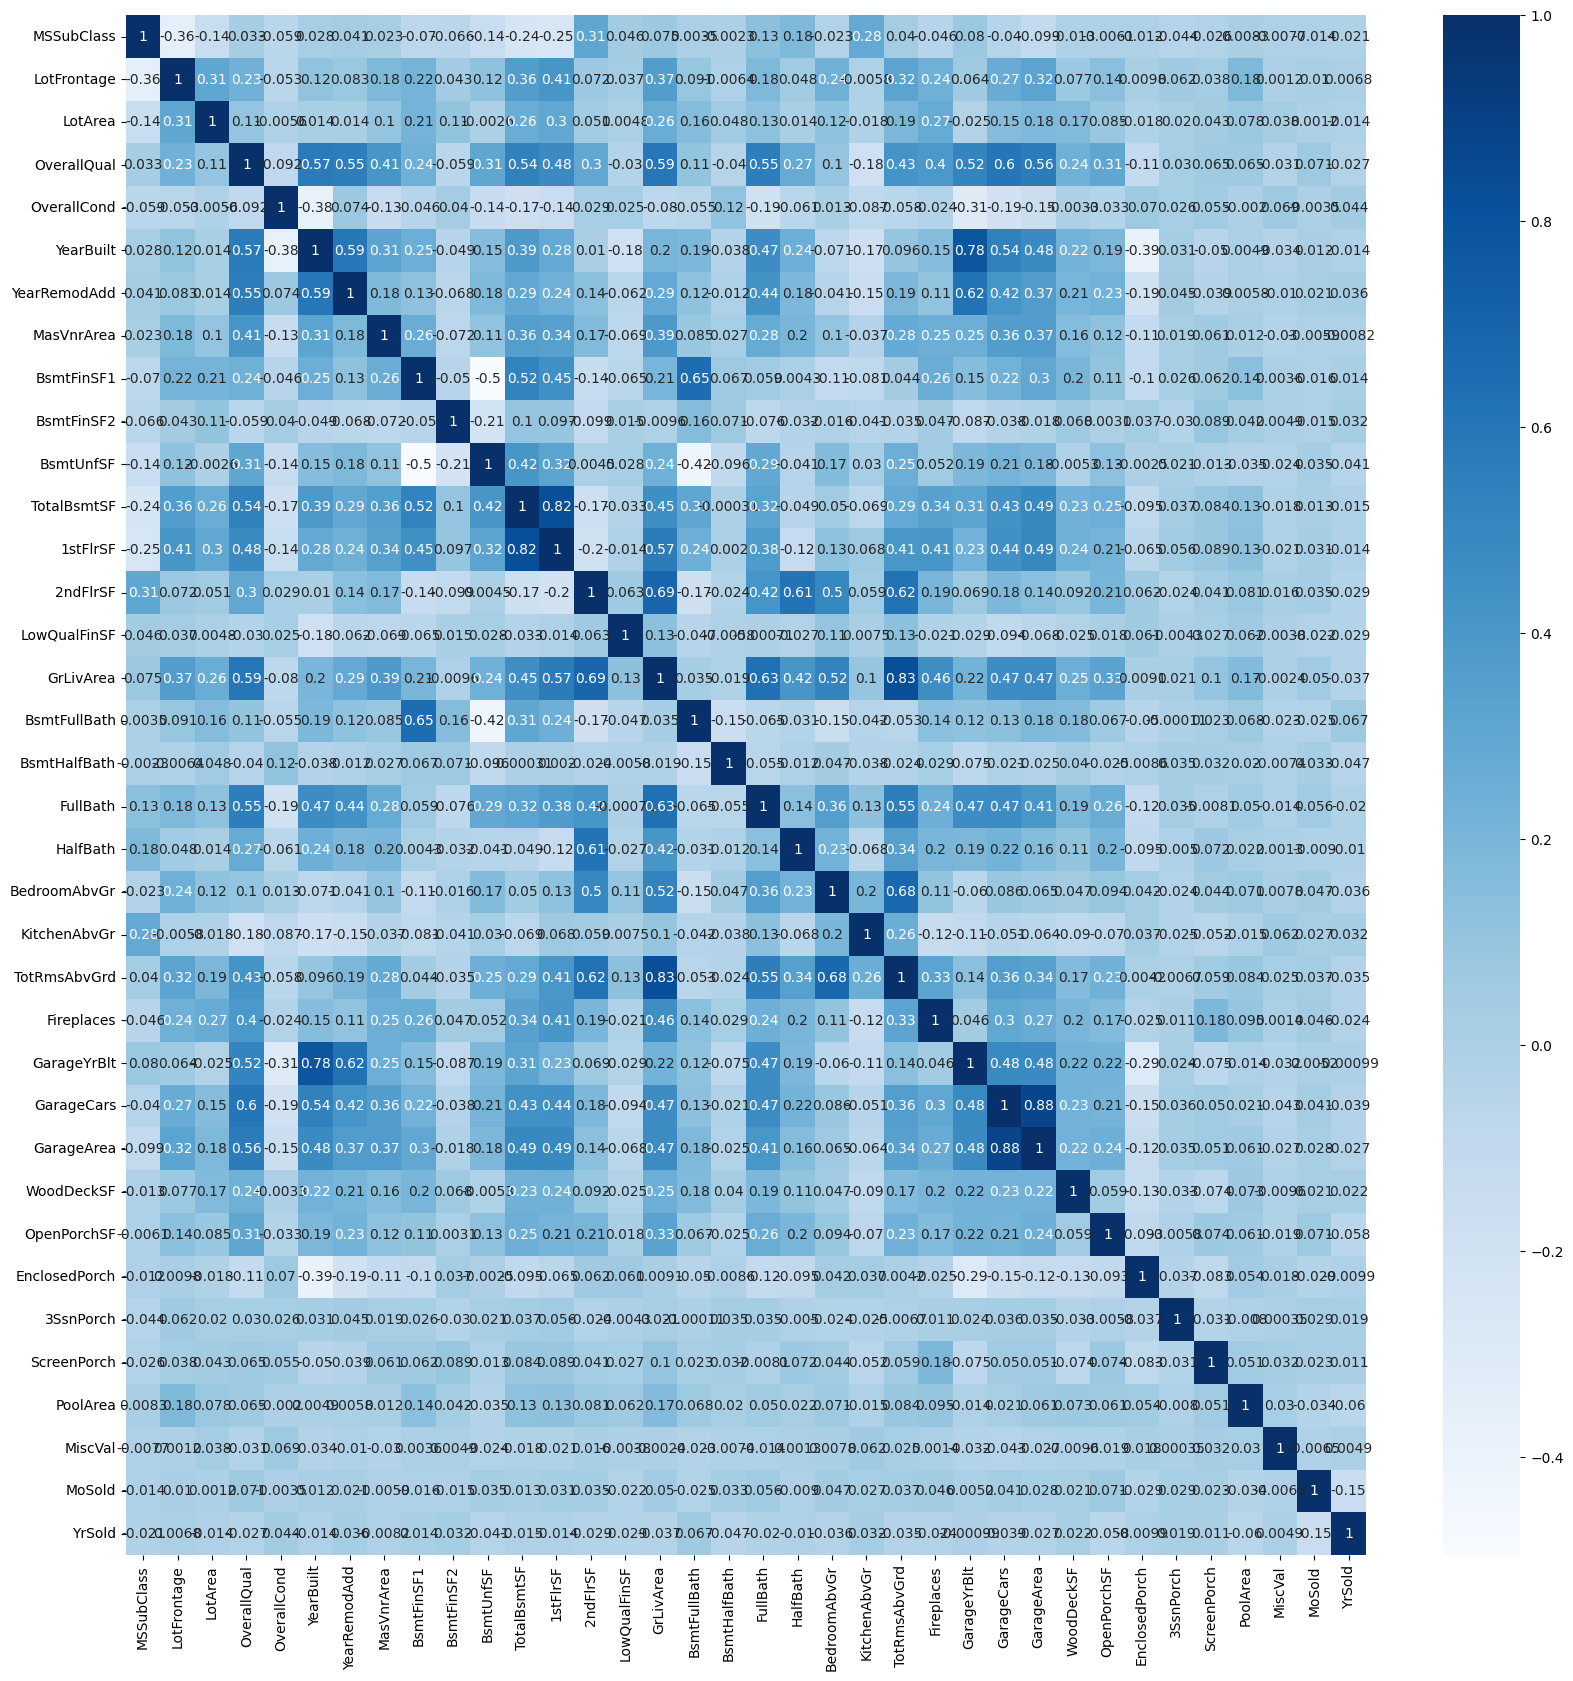

In [31]:
# Visualizing correlation
plt.figure(figsize=(20,20))
sns.heatmap(num_df.corr(),annot =True,cmap='Blues')
plt.show()

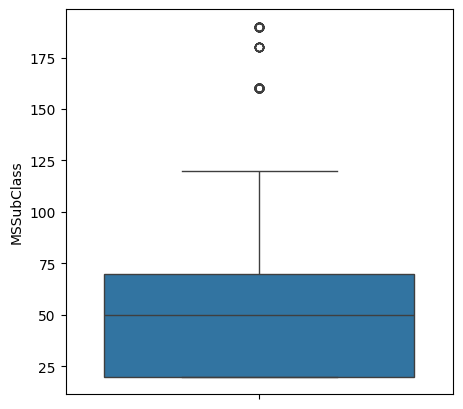

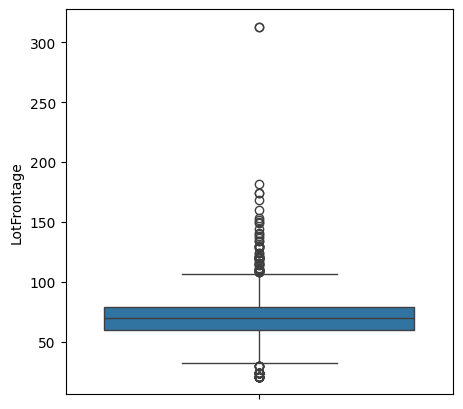

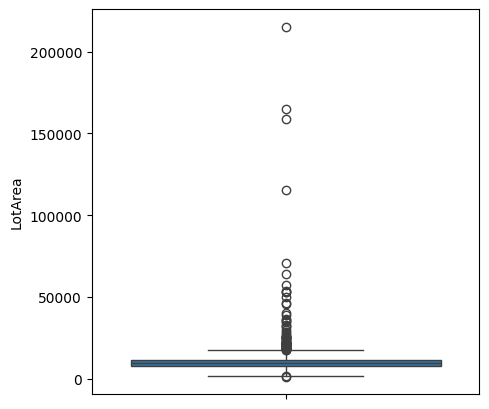

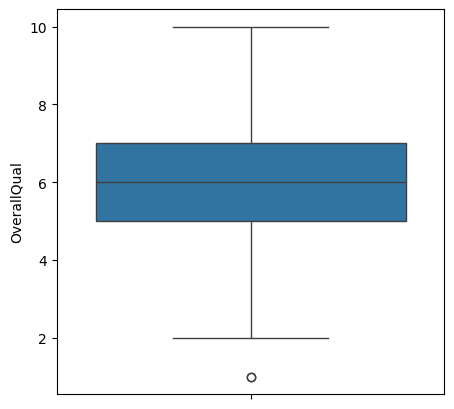

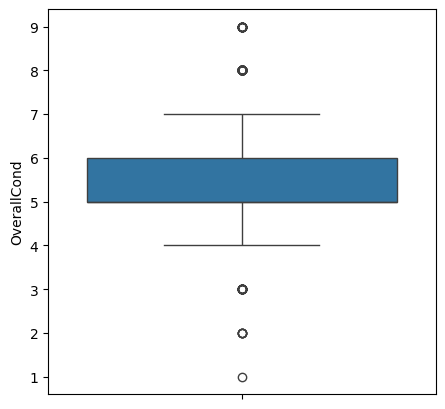

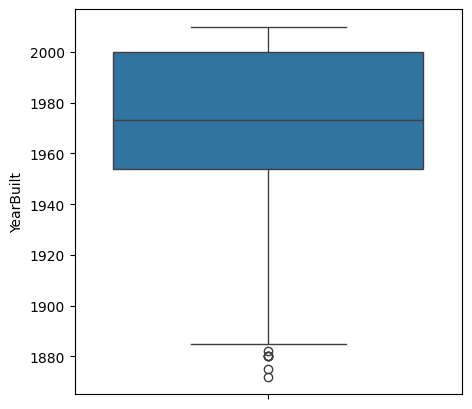

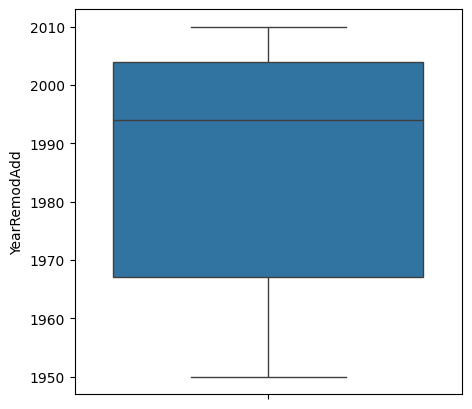

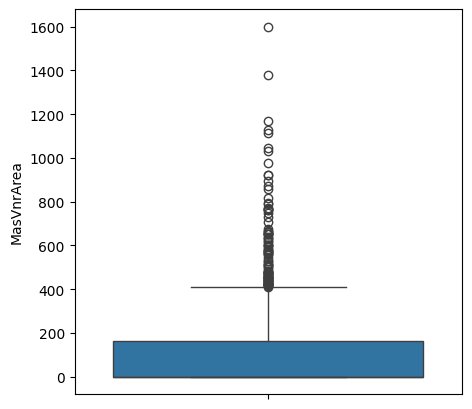

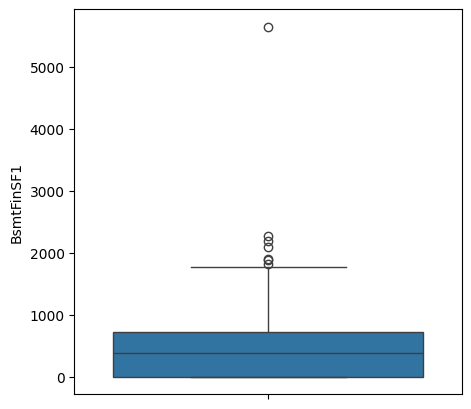

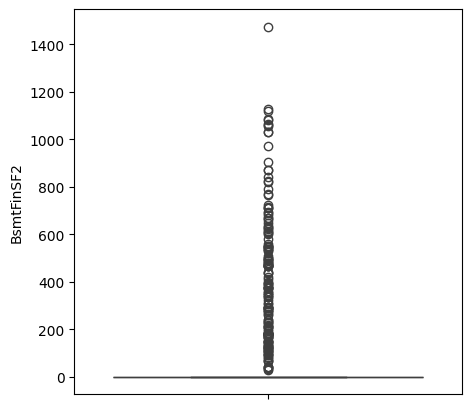

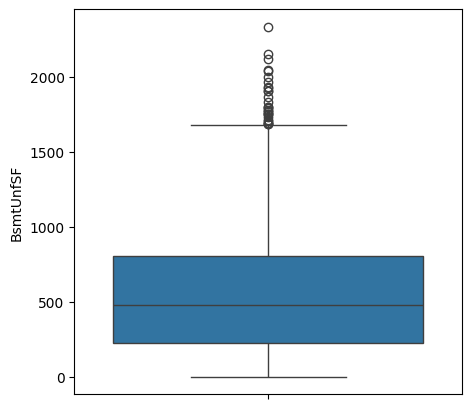

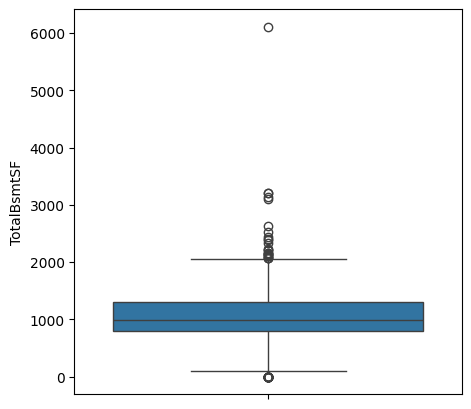

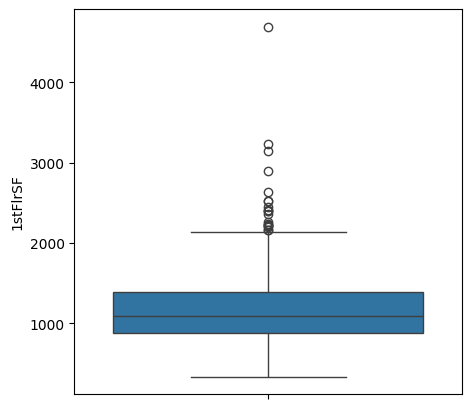

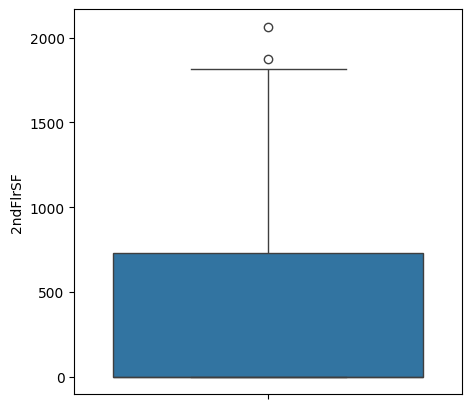

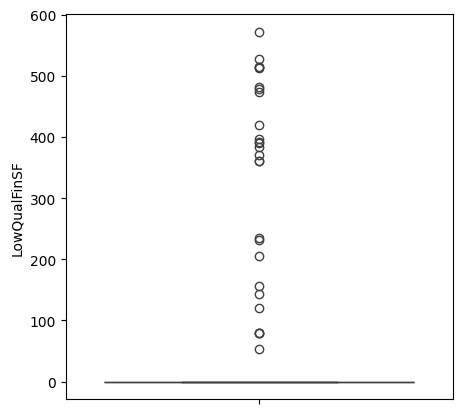

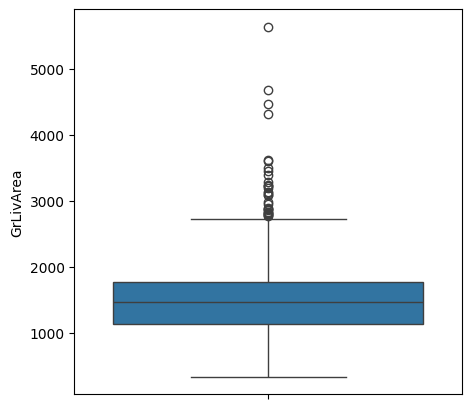

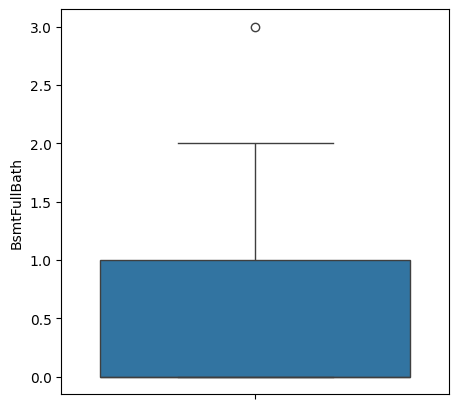

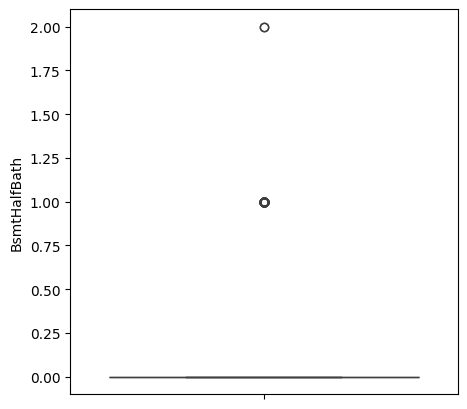

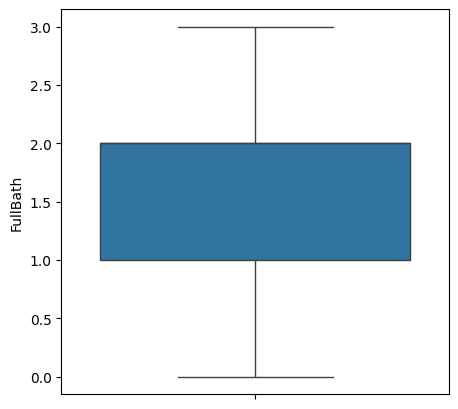

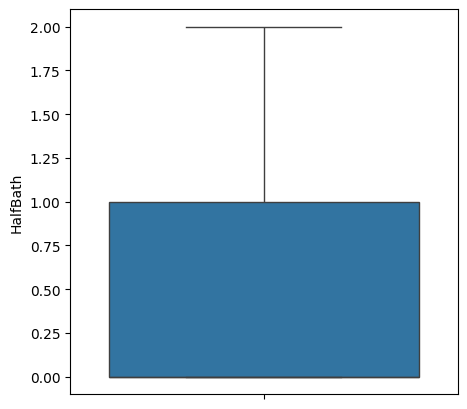

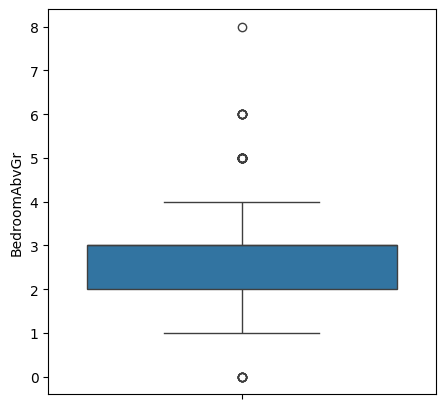

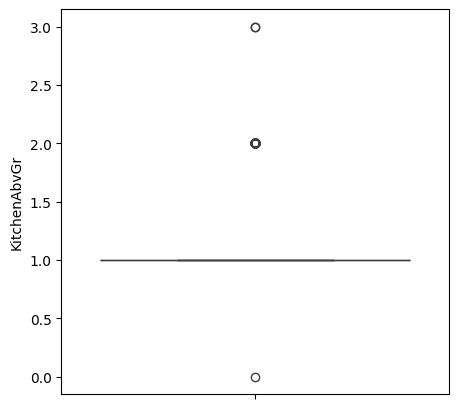

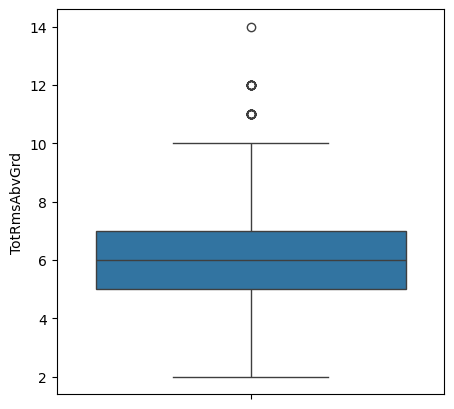

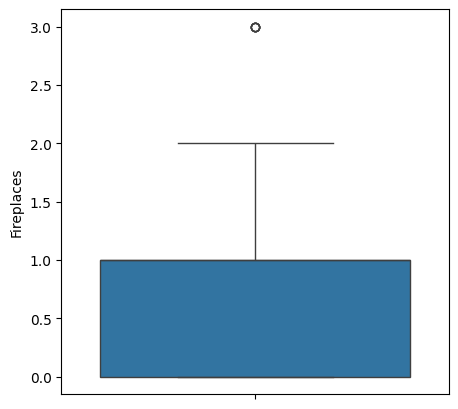

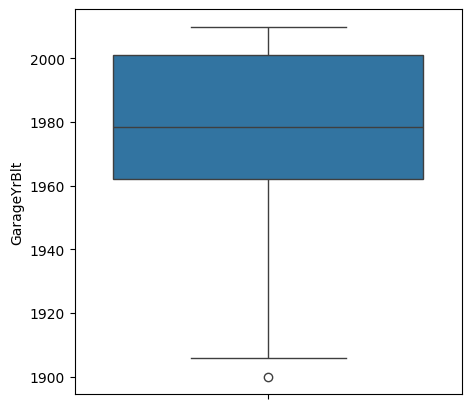

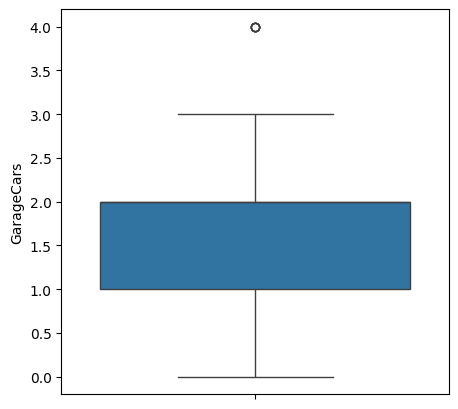

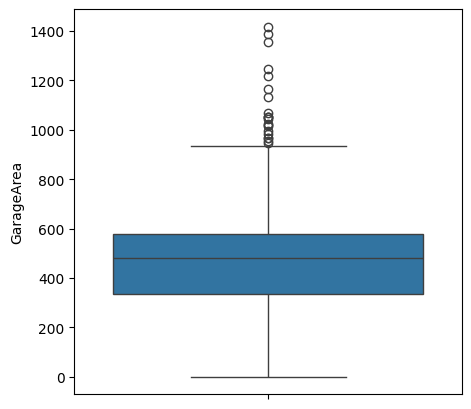

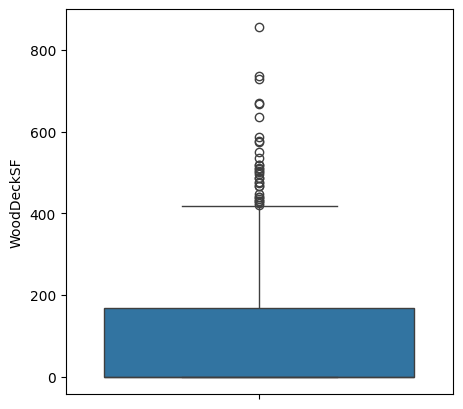

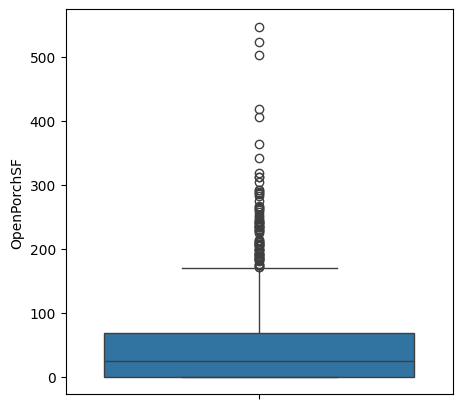

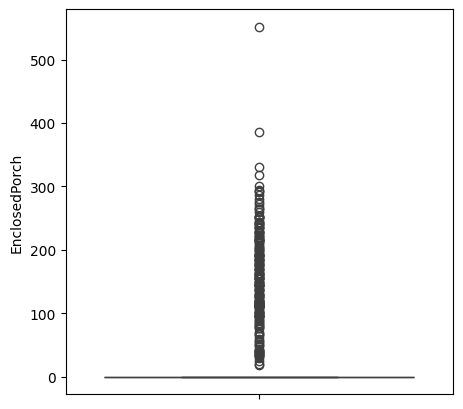

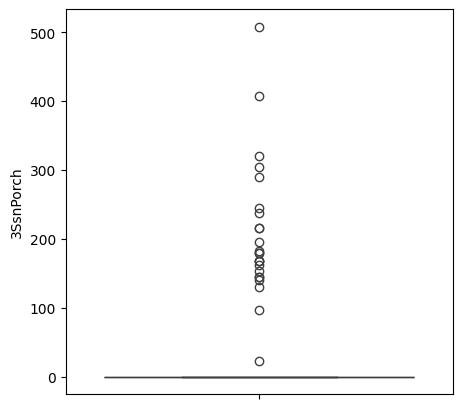

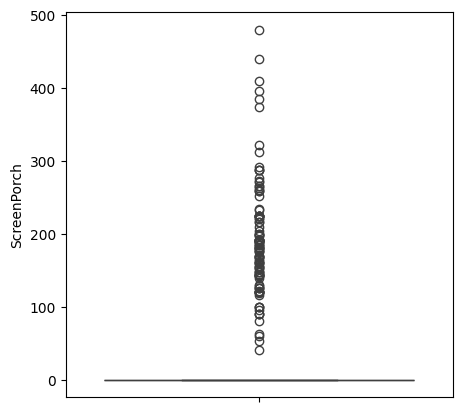

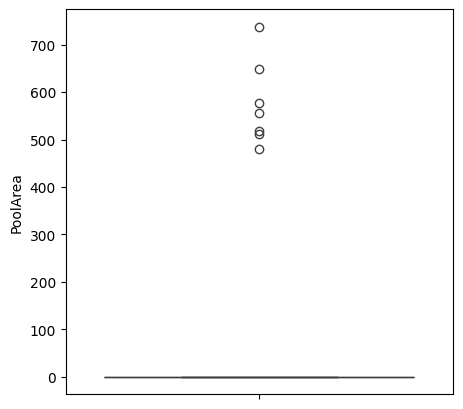

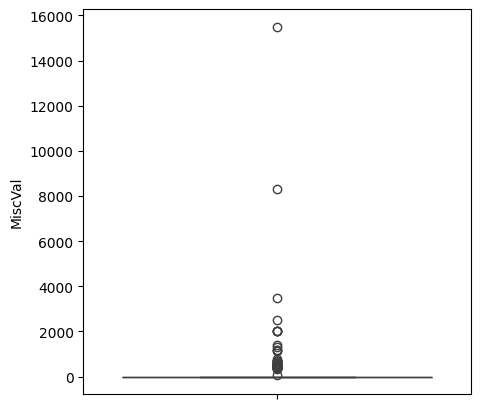

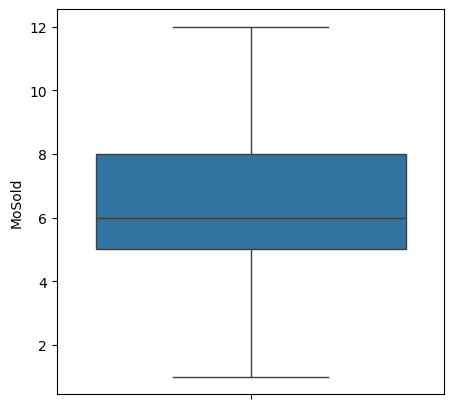

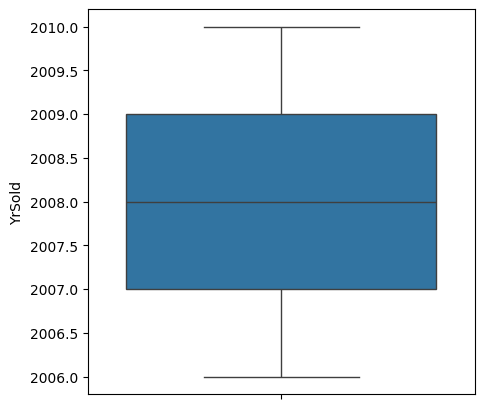

In [32]:
# Checking outliers
for i in num_df.columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(num_df[i])
  plt.show()

In [33]:
# Outlier treatment
def outlier_treatment(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3-q1
  upper_limit = q3 + 1.5*iqr
  lower_limit = q1 - 1.5*iqr
  return x.clip(lower = lower_limit,upper=upper_limit)

In [34]:
num_df = num_df.apply(outlier_treatment)

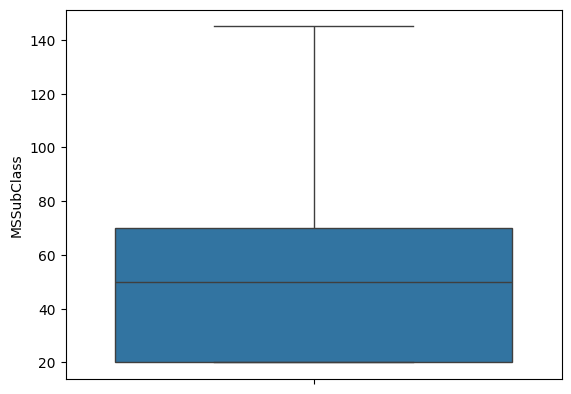

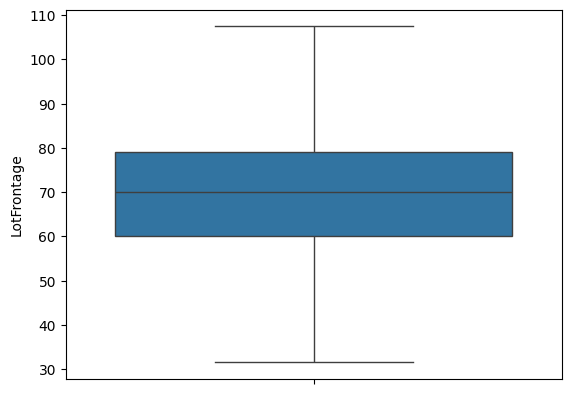

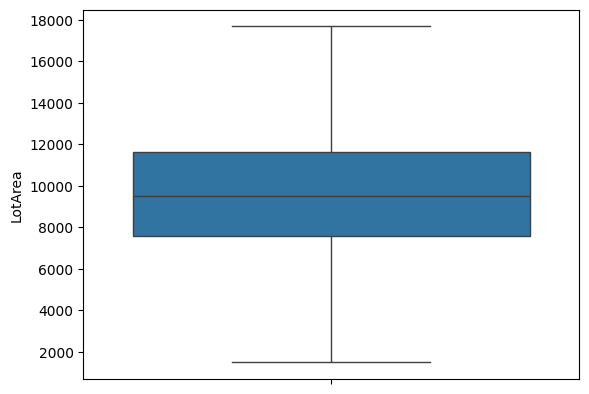

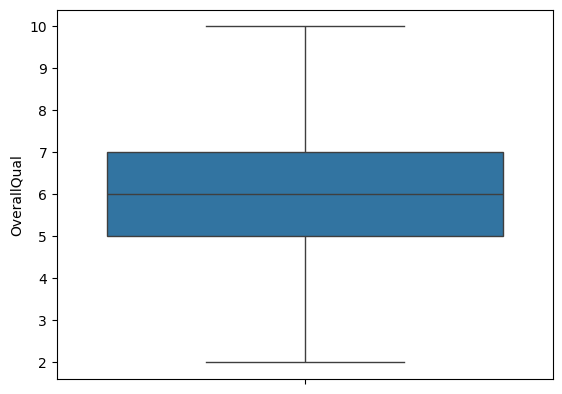

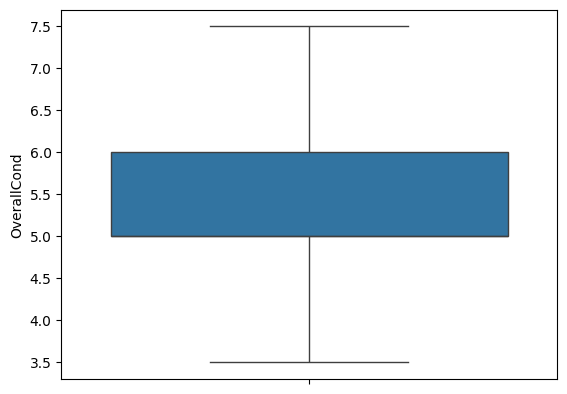

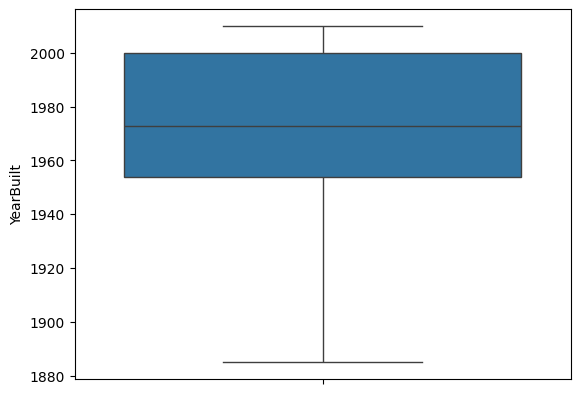

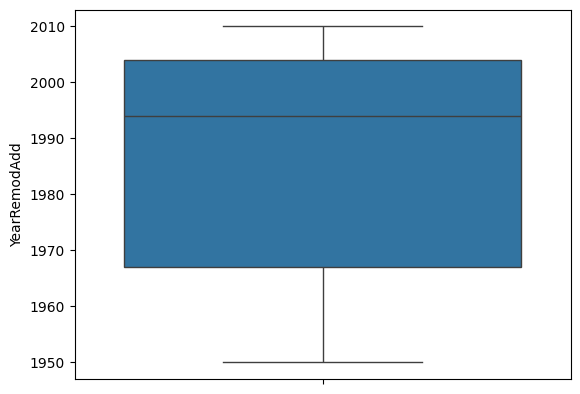

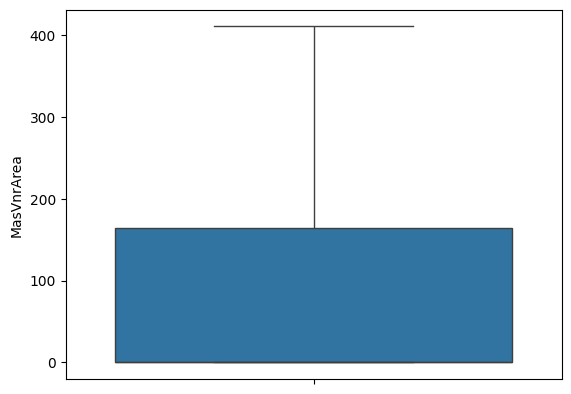

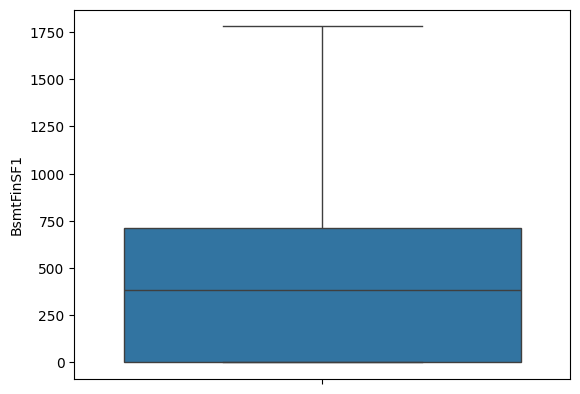

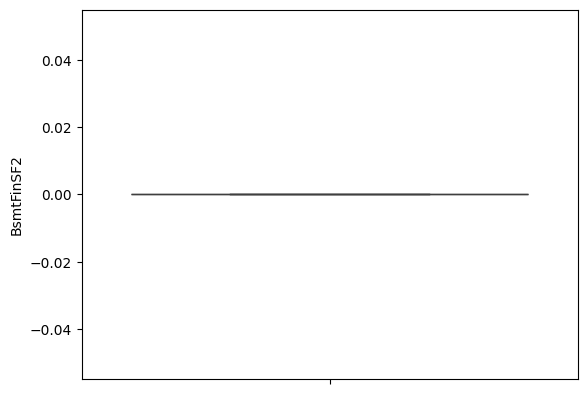

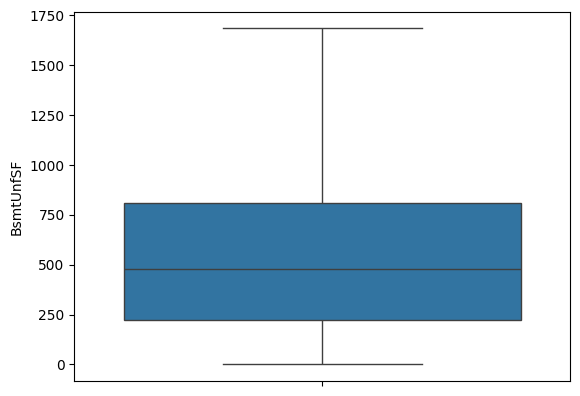

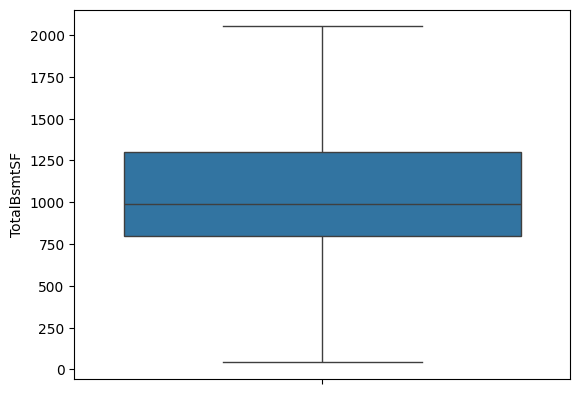

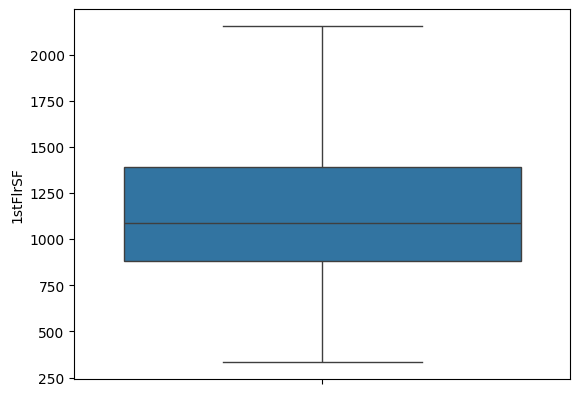

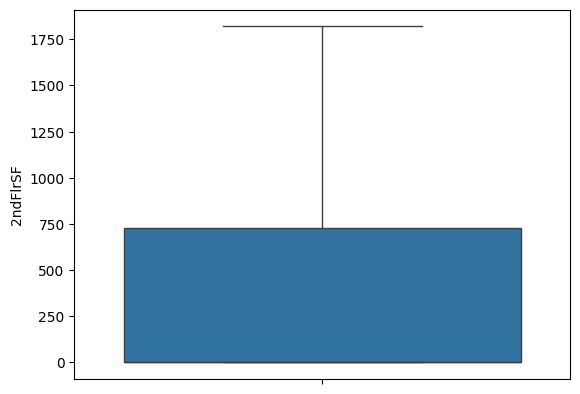

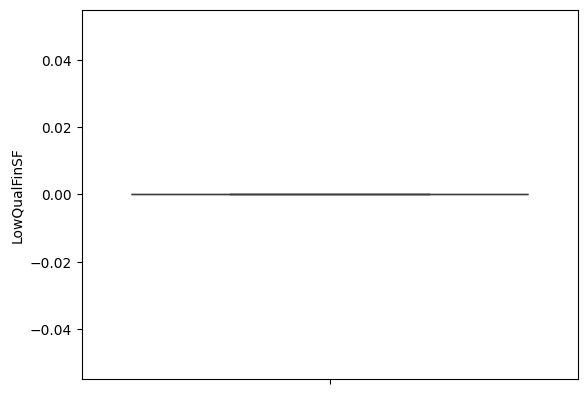

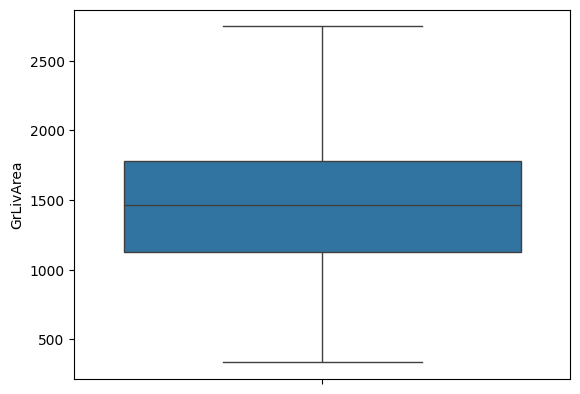

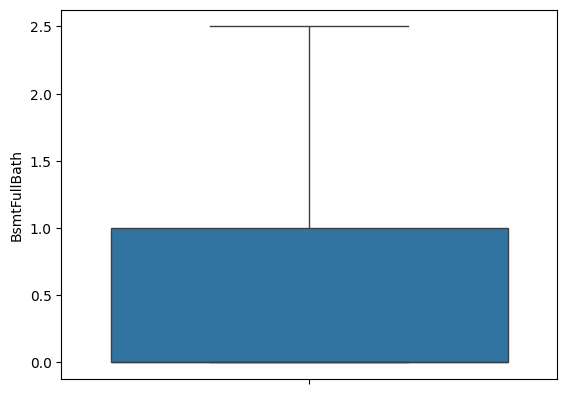

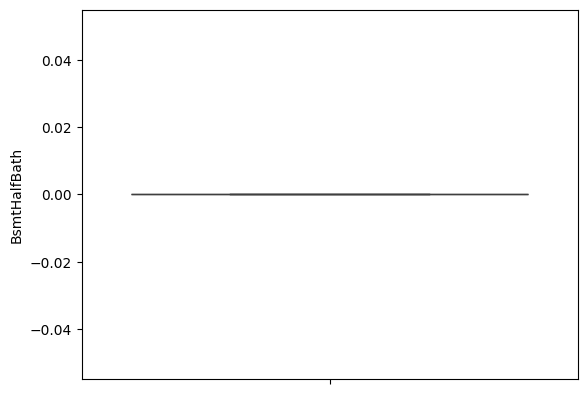

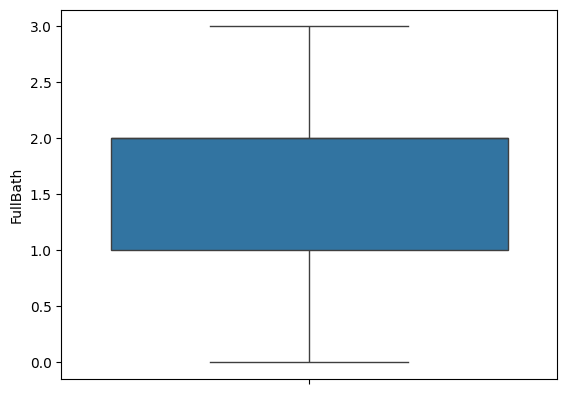

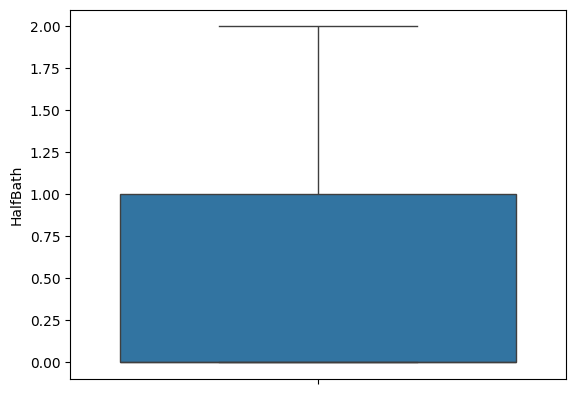

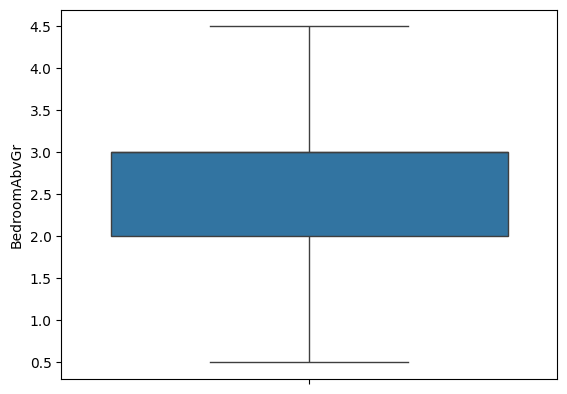

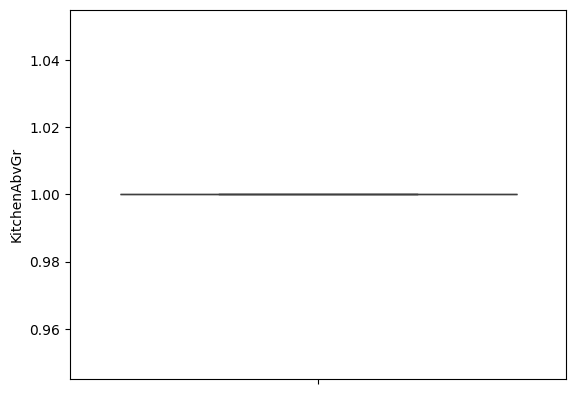

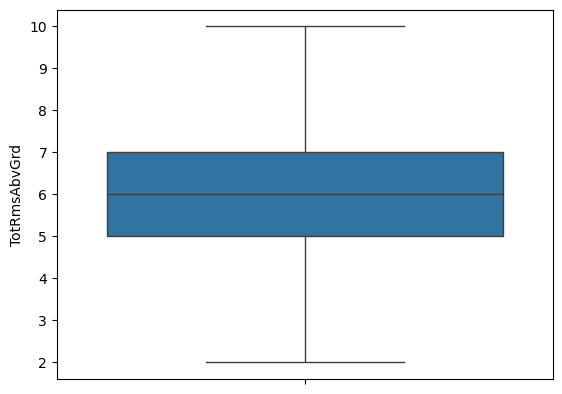

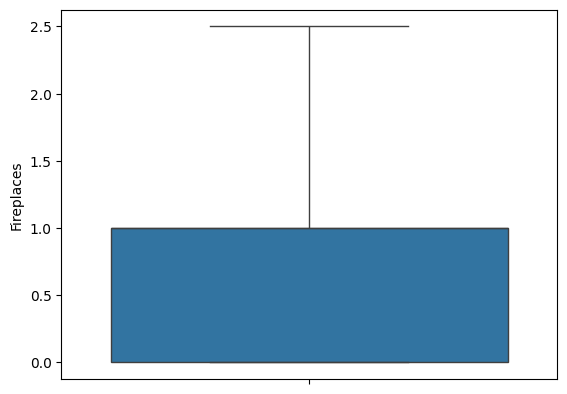

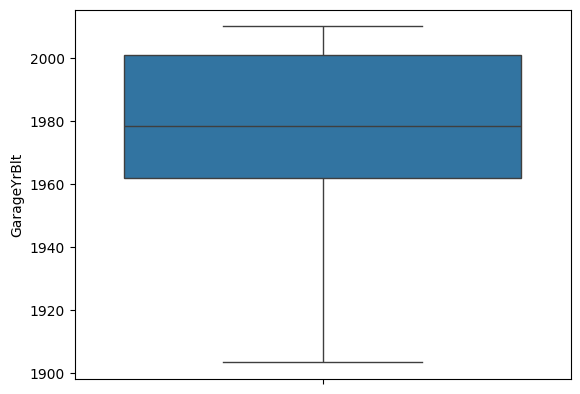

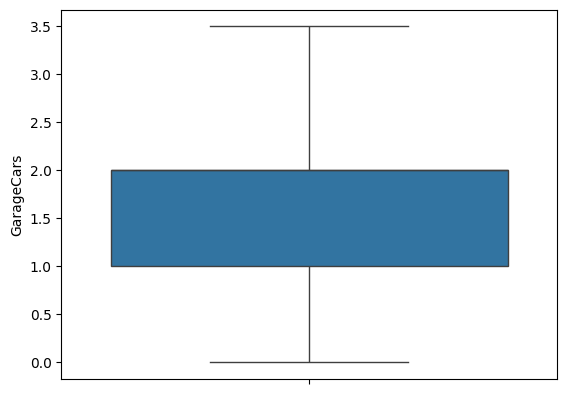

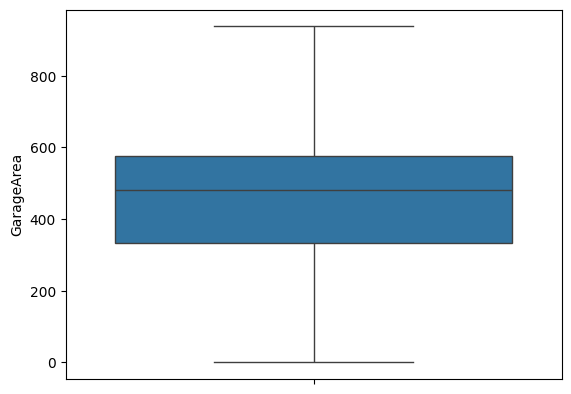

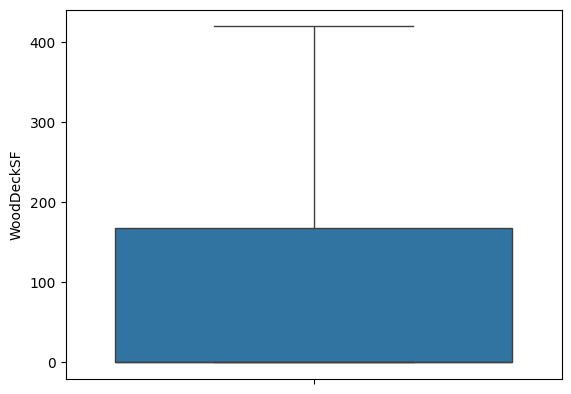

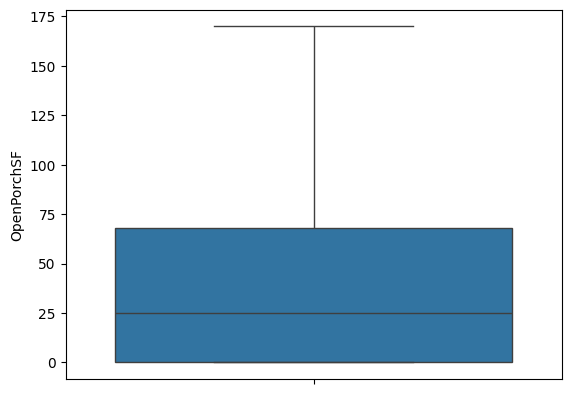

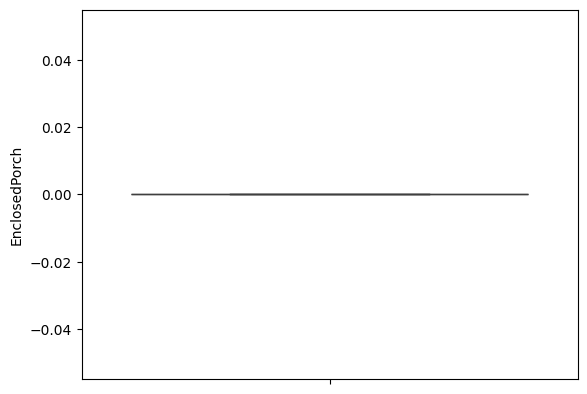

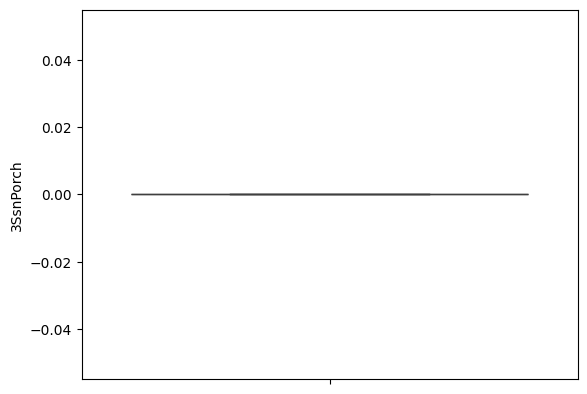

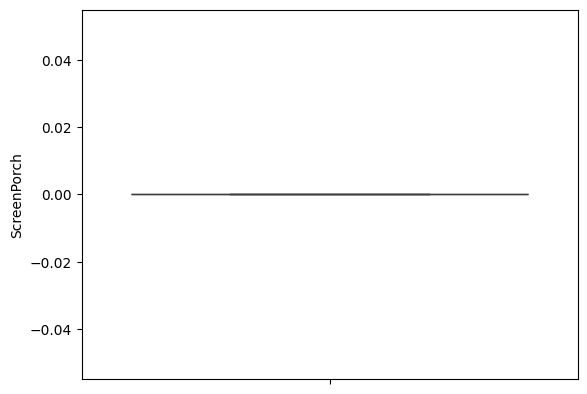

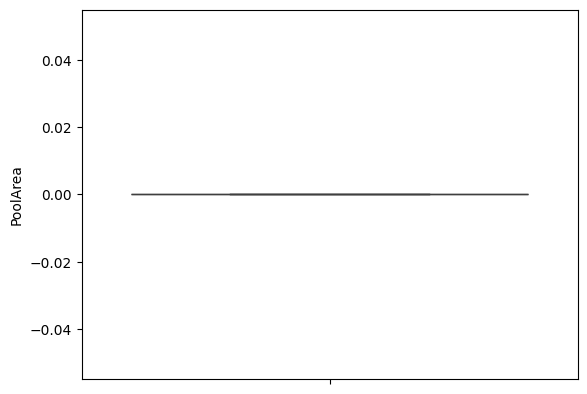

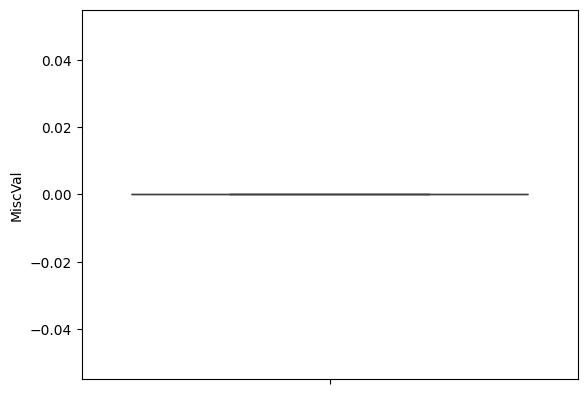

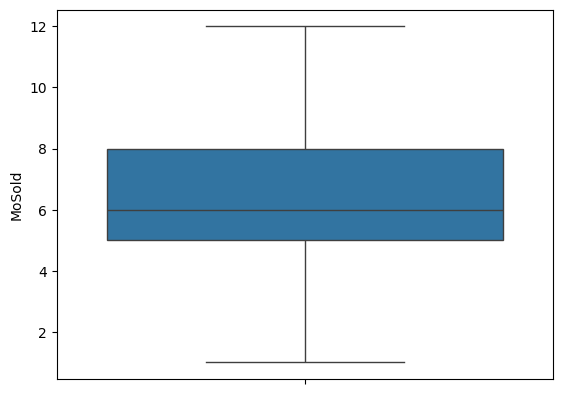

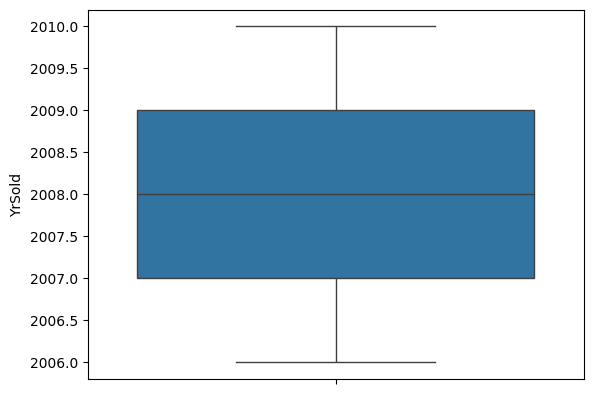

In [35]:
for i in num_df.columns:
  sns.boxplot(num_df[i])
  plt.show()

In [36]:
num_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

# Exploratory Data Analysis

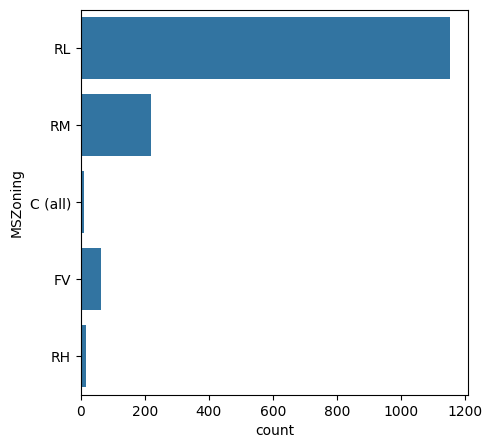

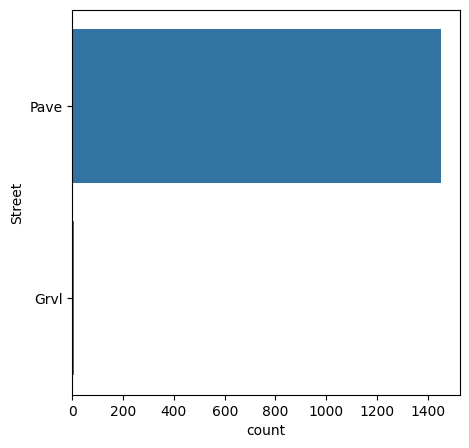

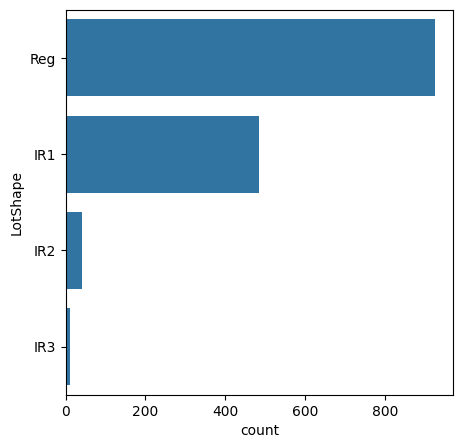

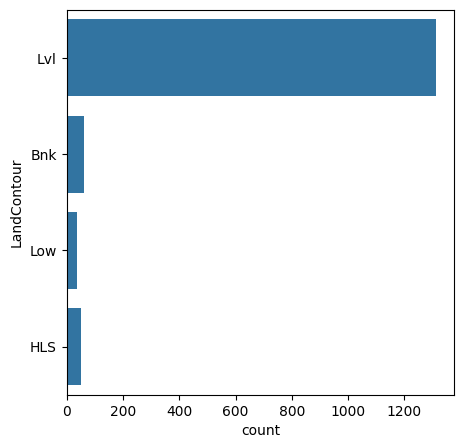

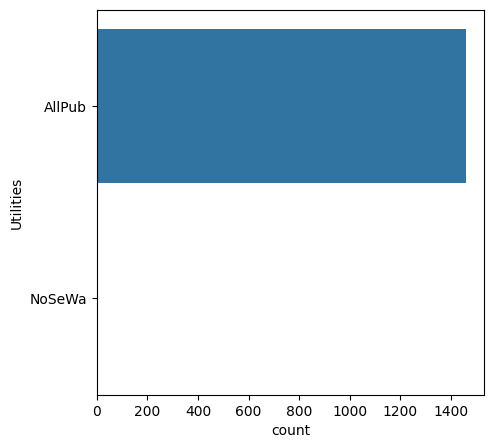

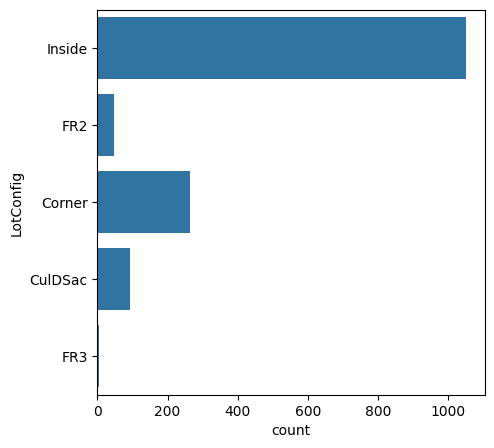

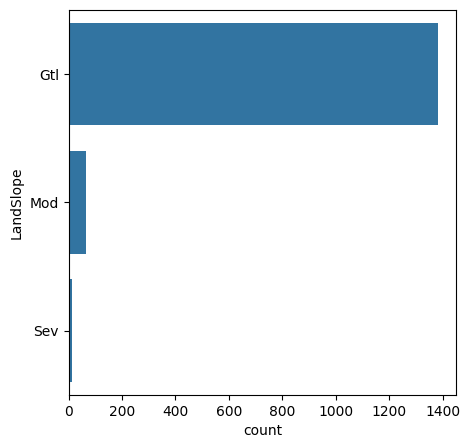

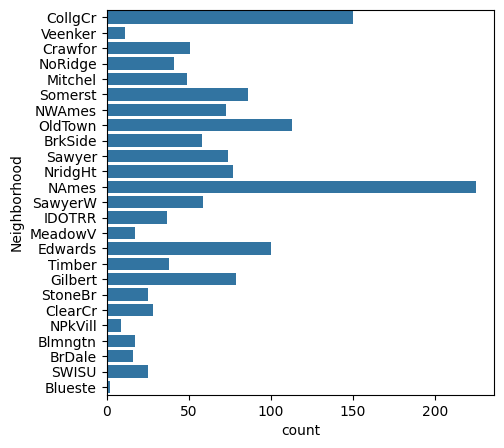

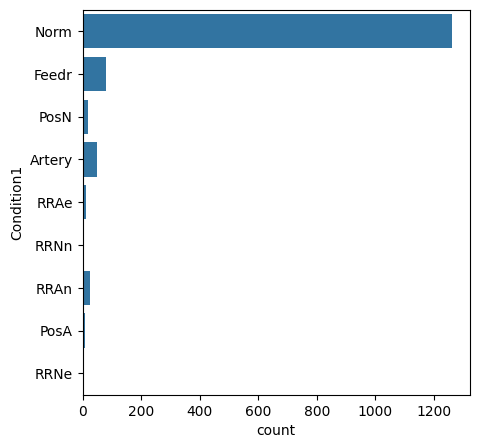

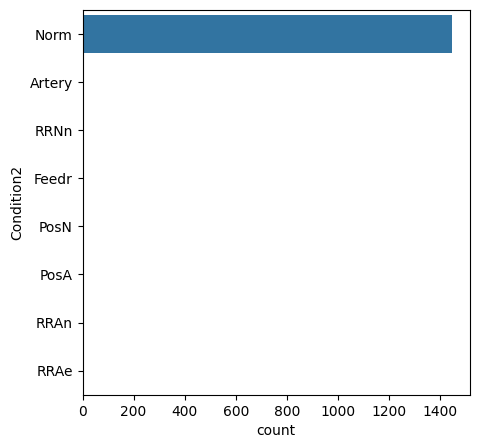

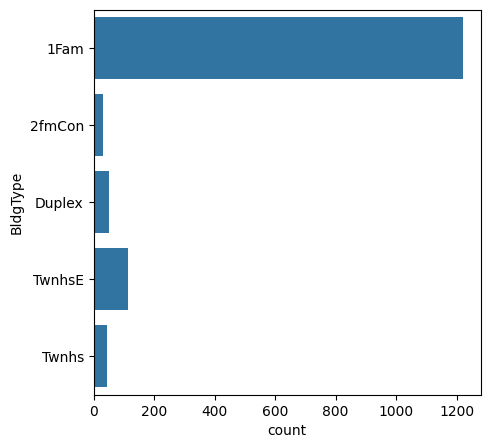

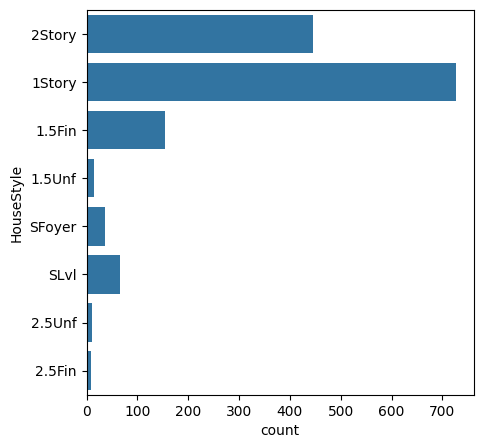

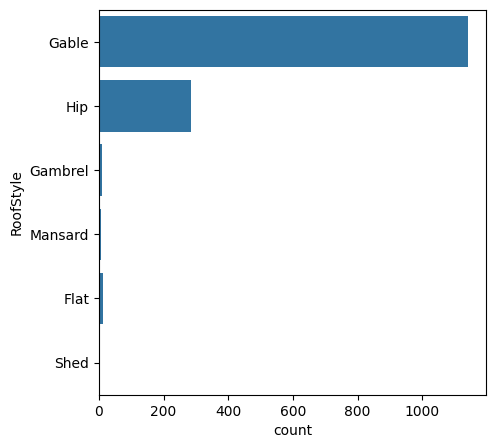

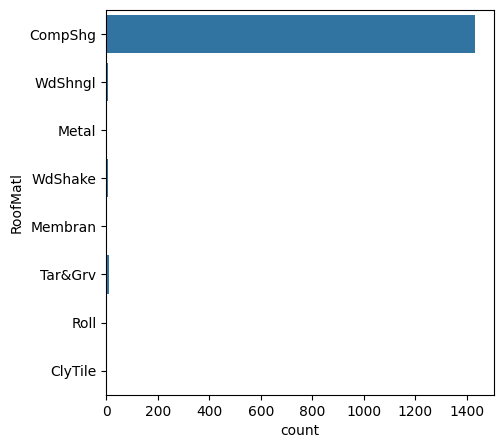

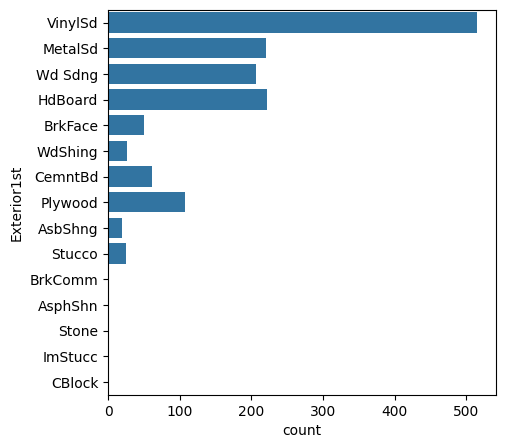

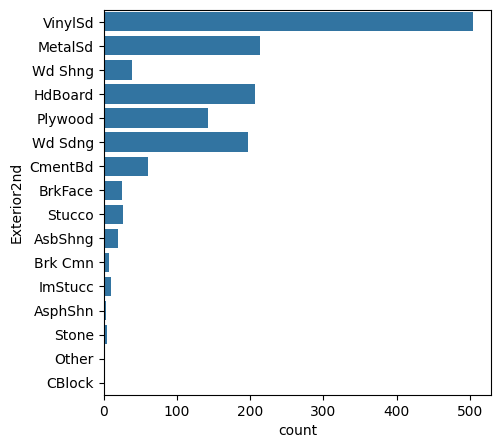

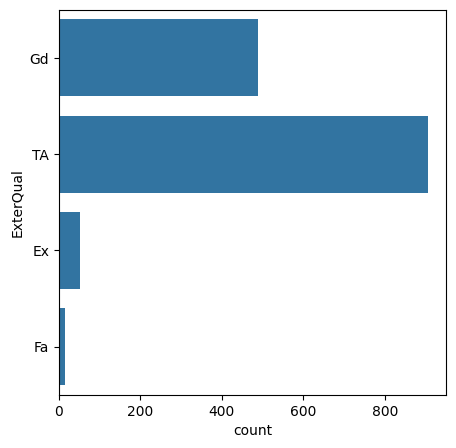

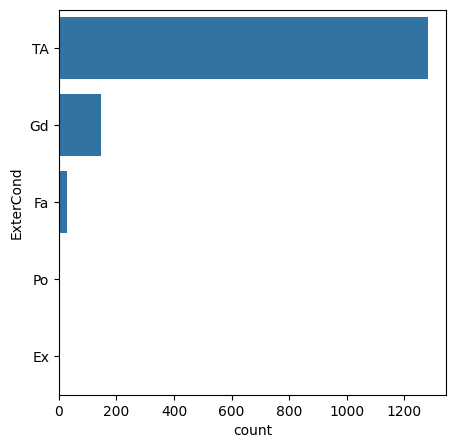

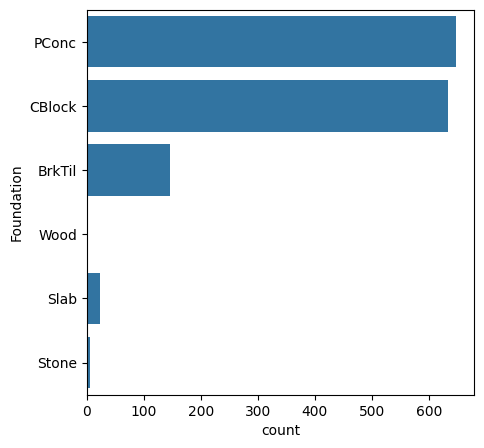

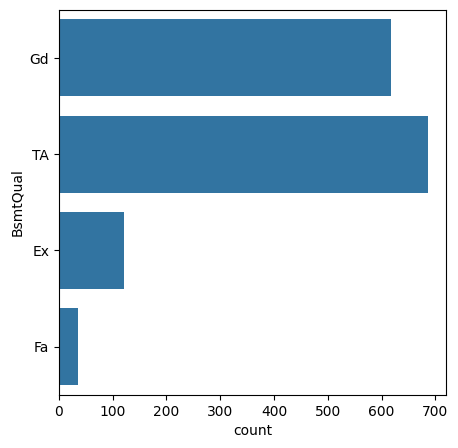

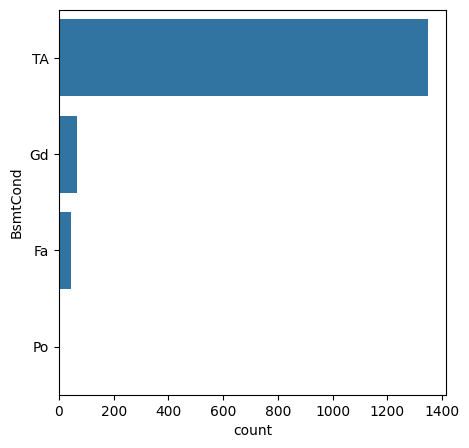

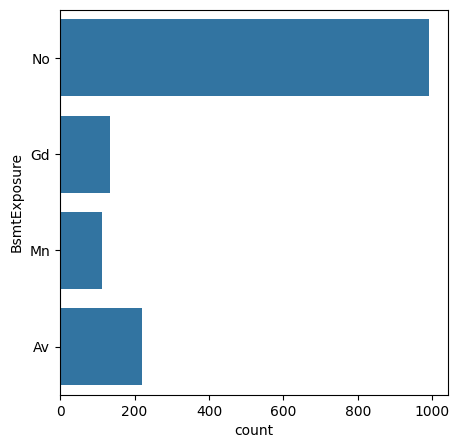

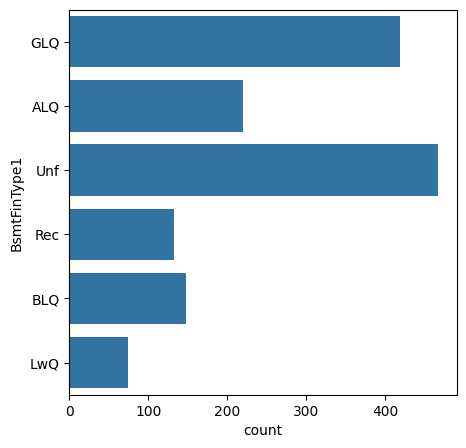

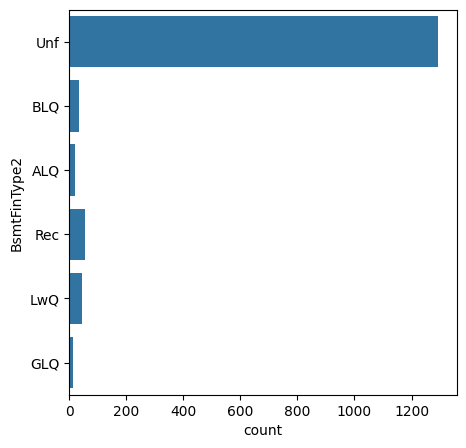

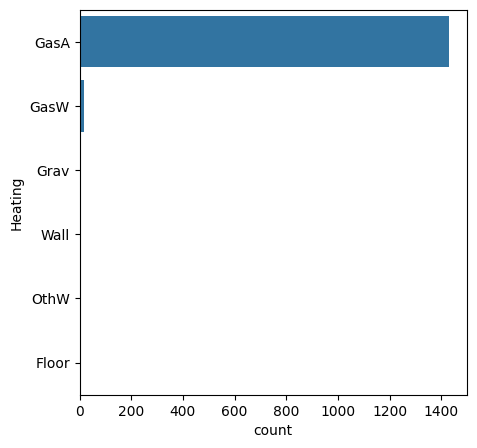

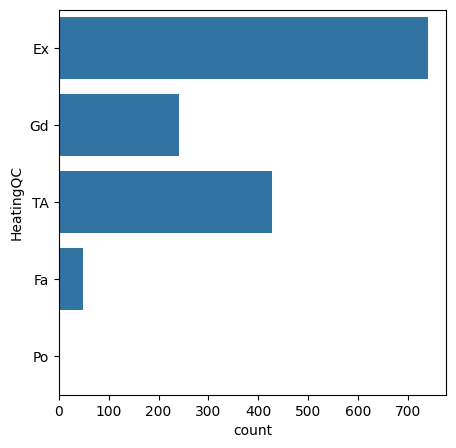

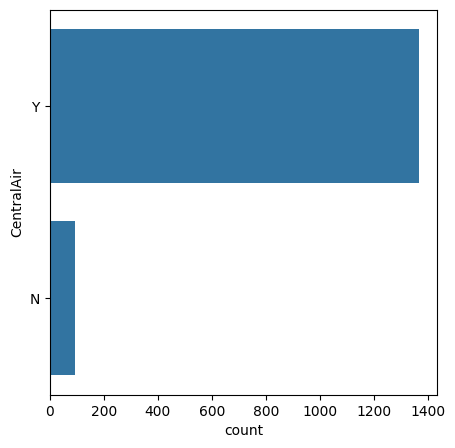

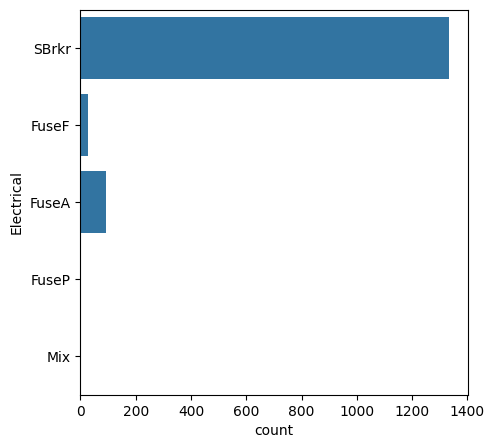

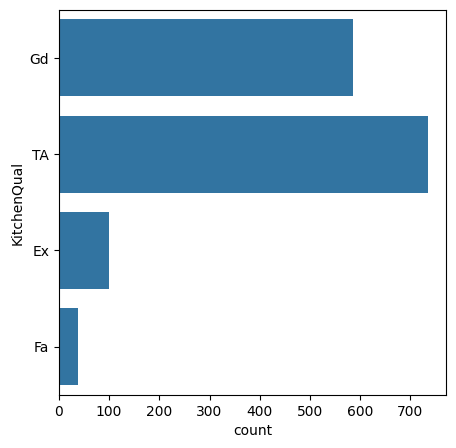

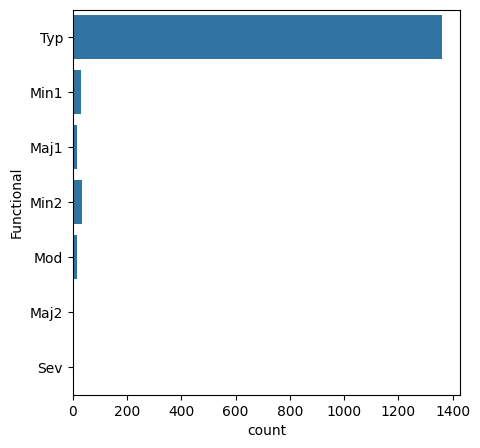

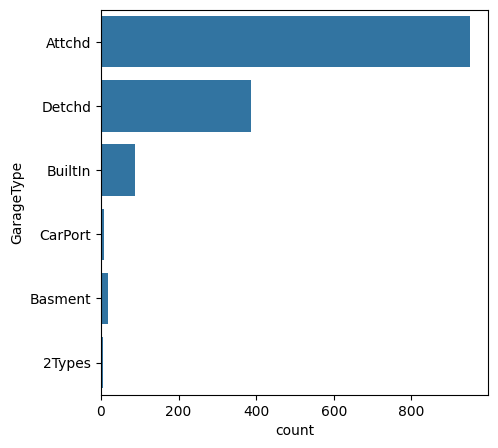

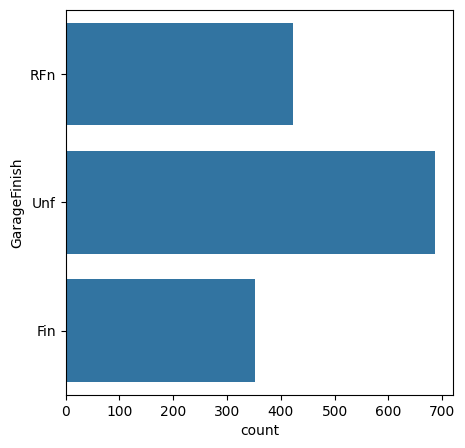

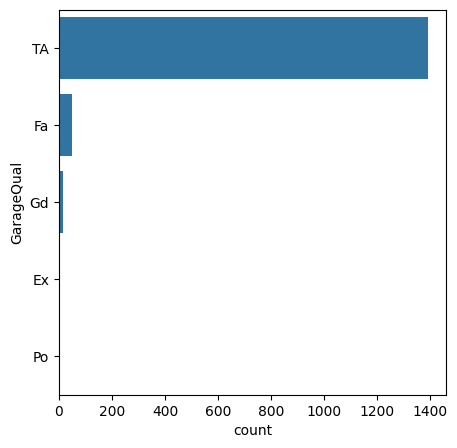

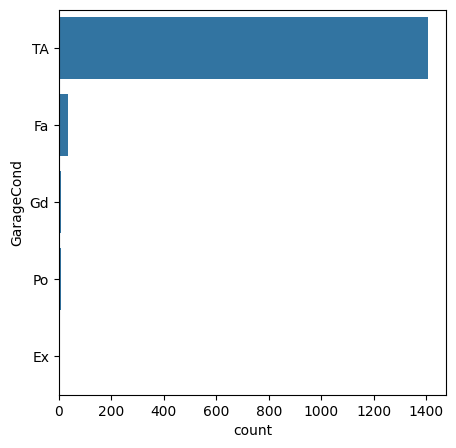

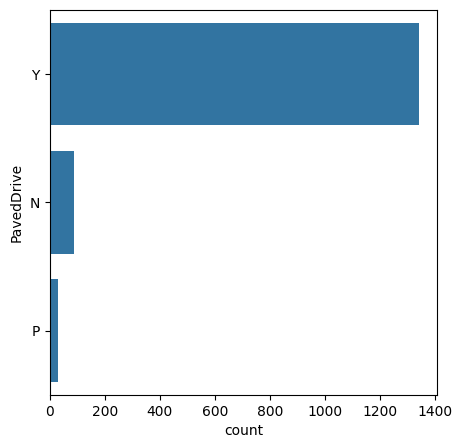

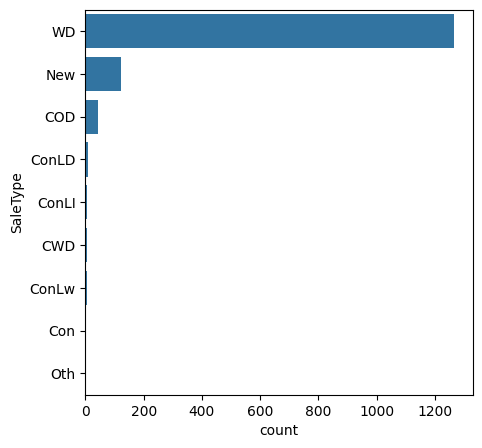

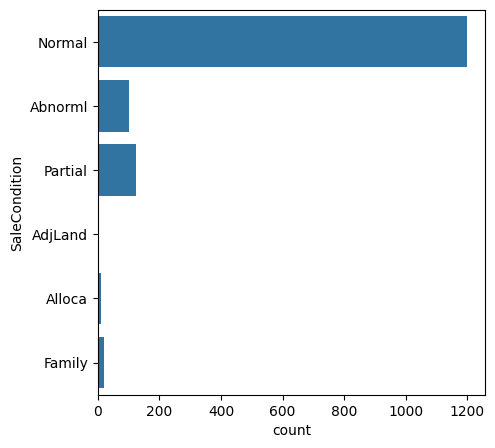

In [37]:
for i in cat_df.columns:
  plt.figure(figsize=(5,5))
  sns.countplot(cat_df[i])
  plt.show()

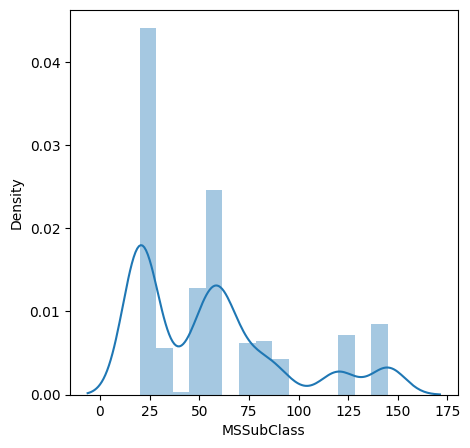

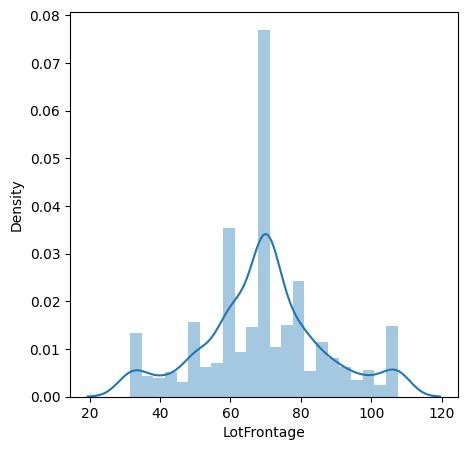

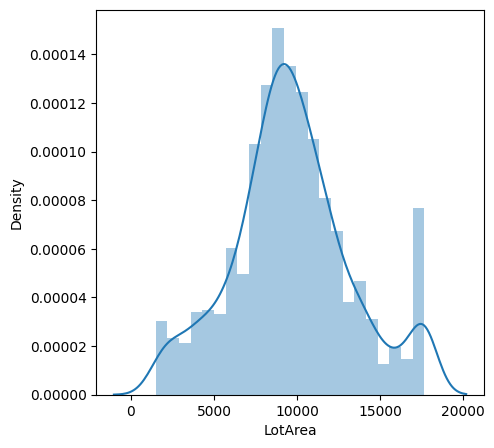

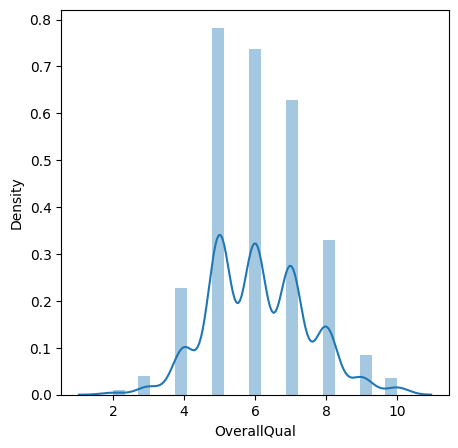

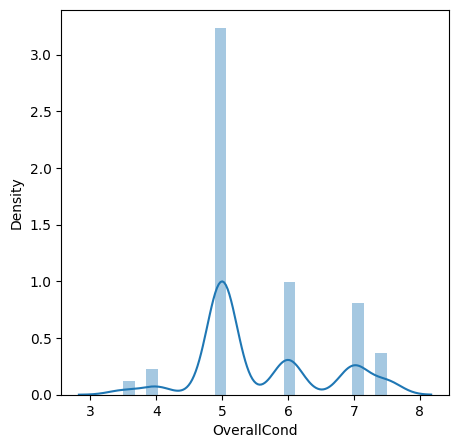

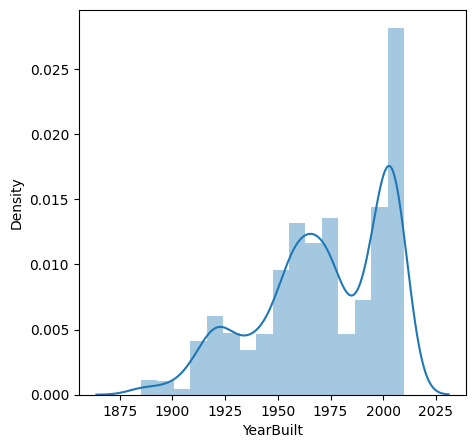

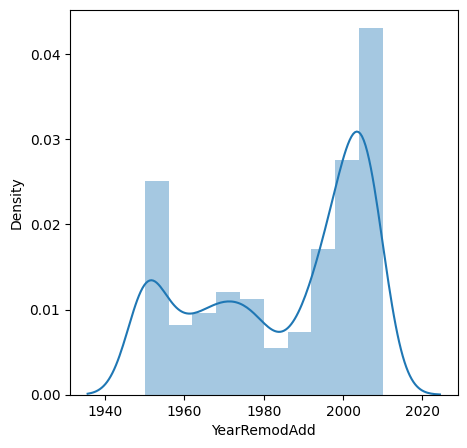

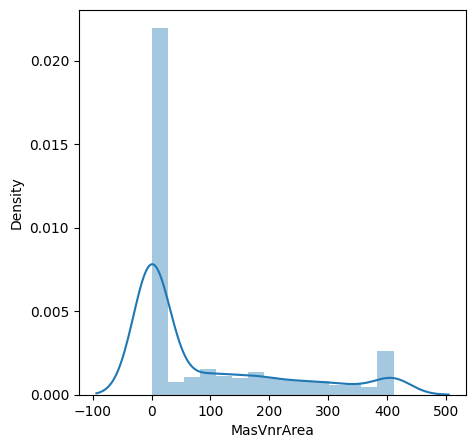

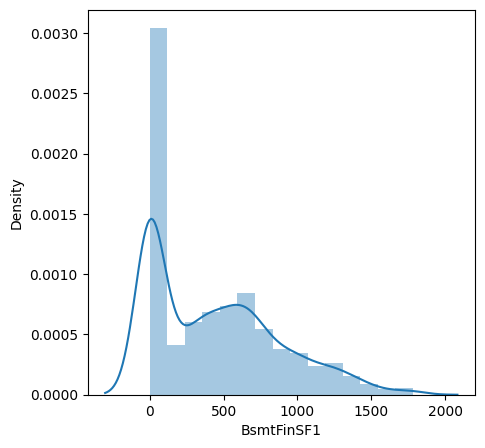

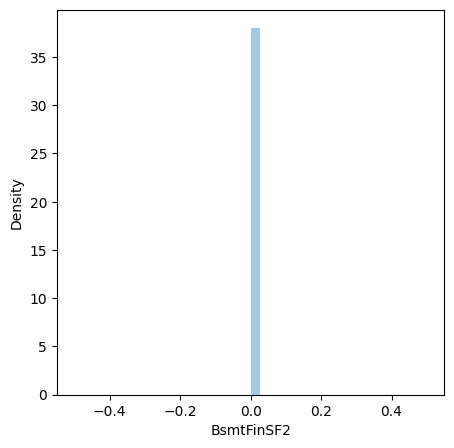

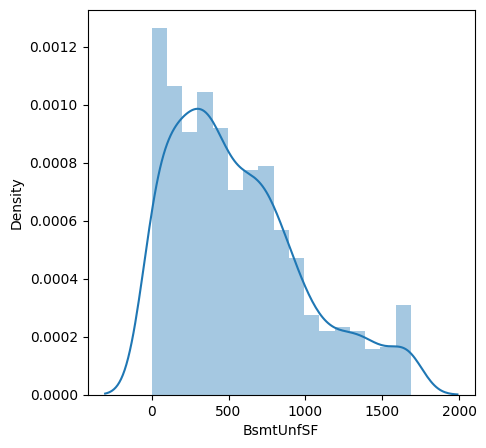

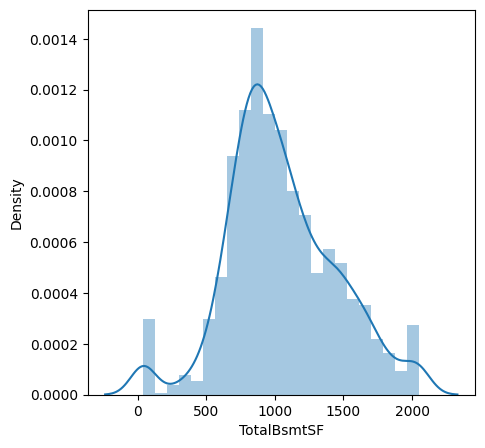

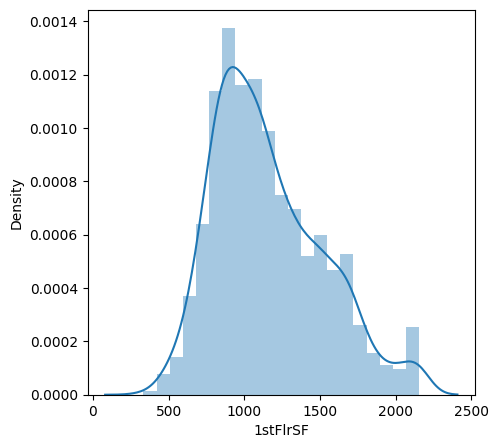

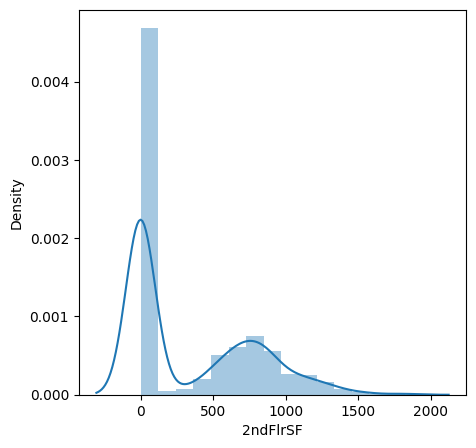

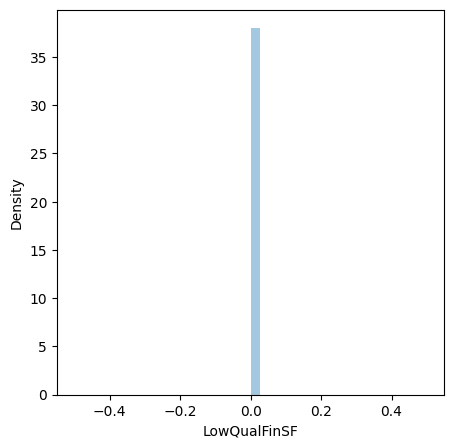

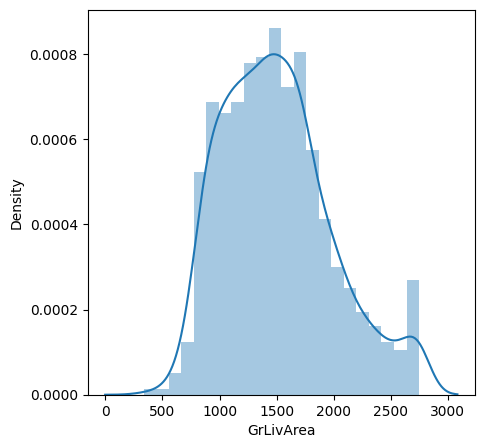

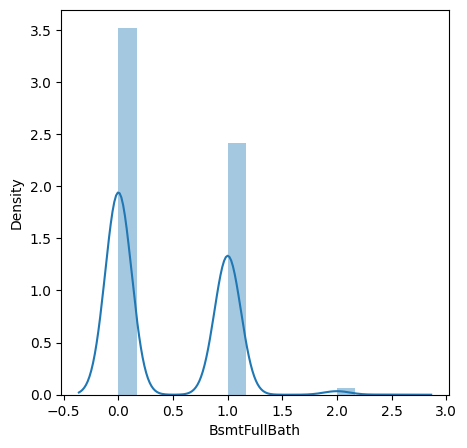

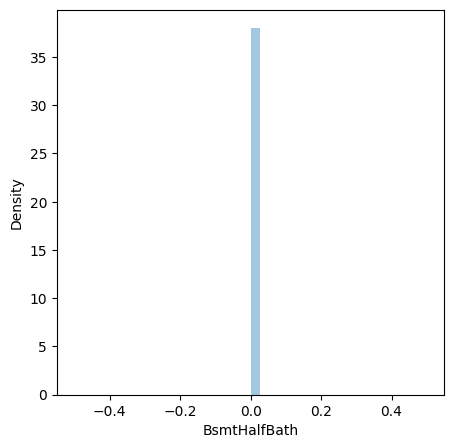

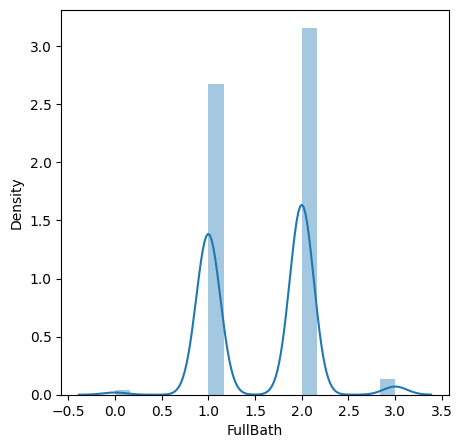

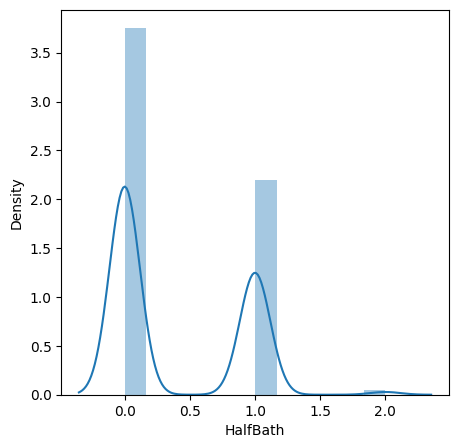

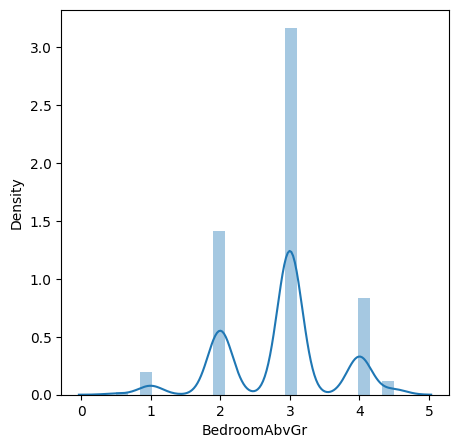

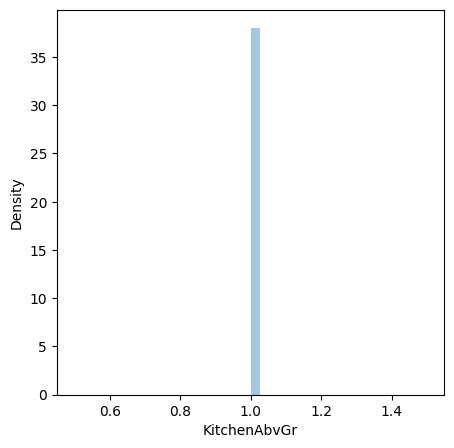

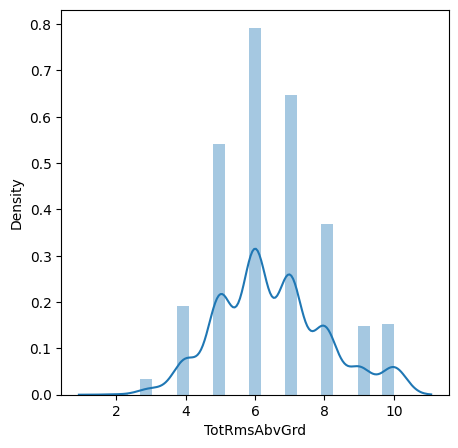

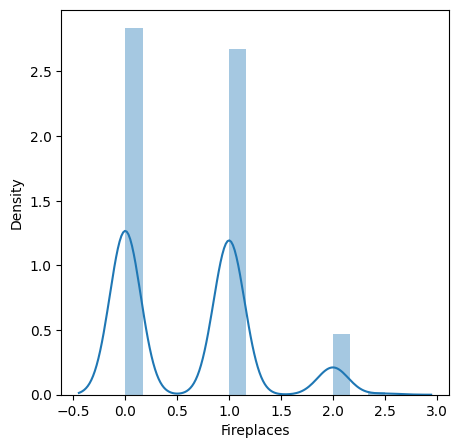

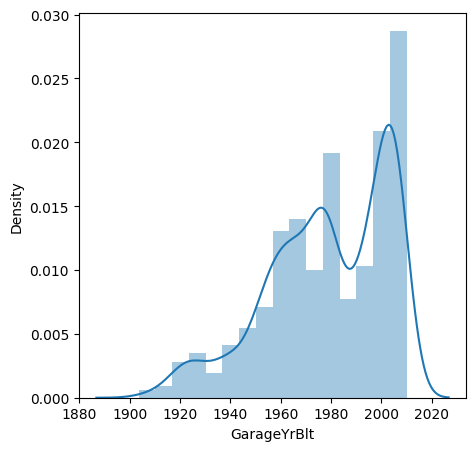

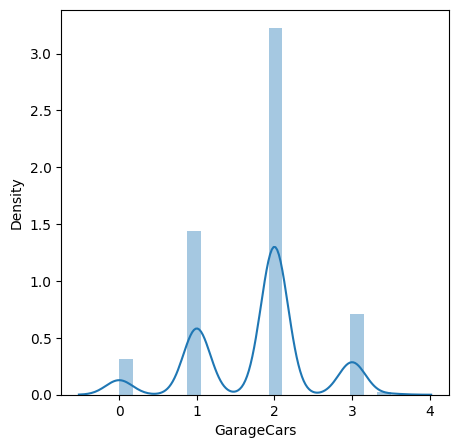

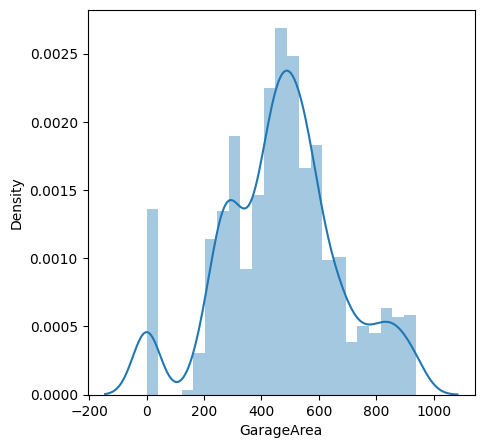

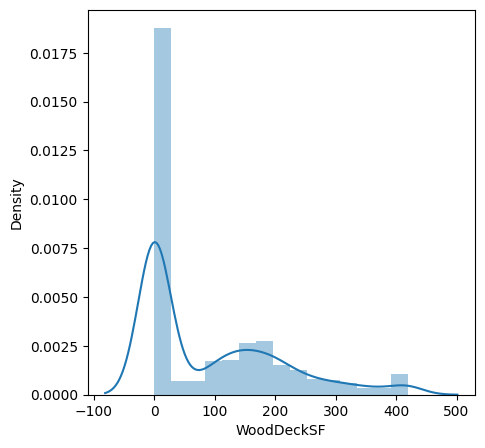

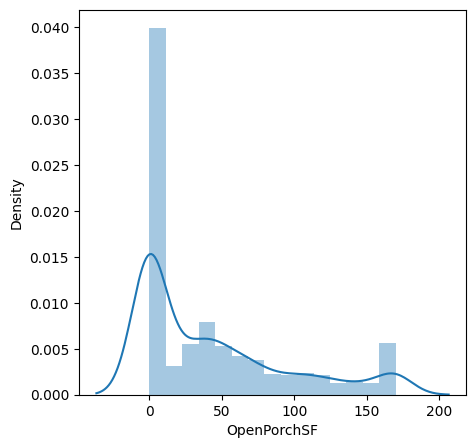

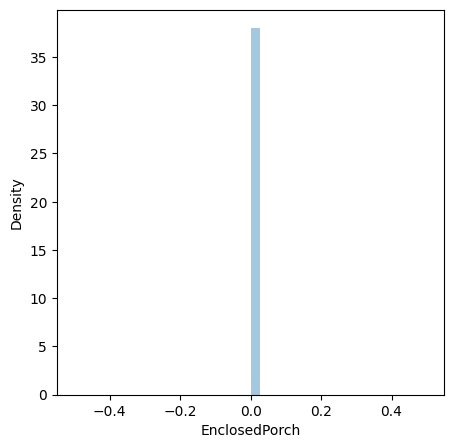

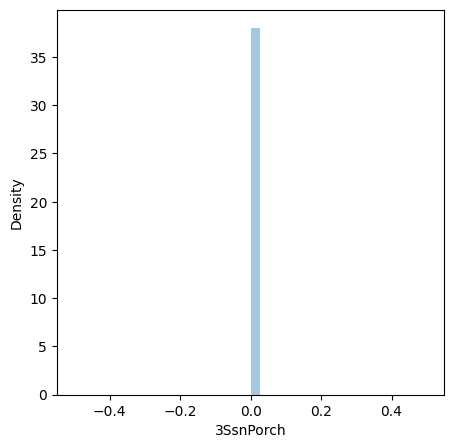

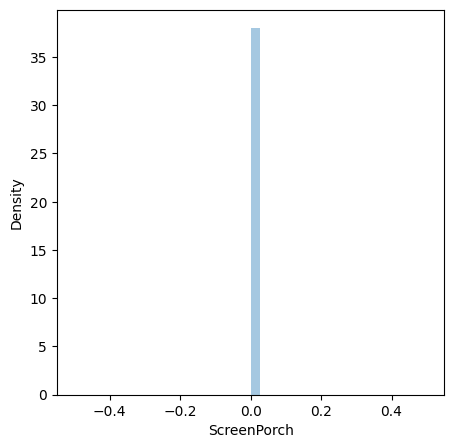

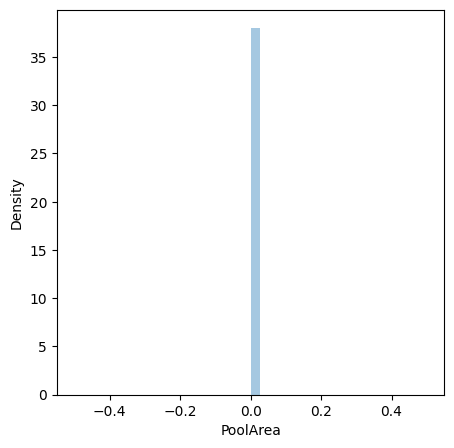

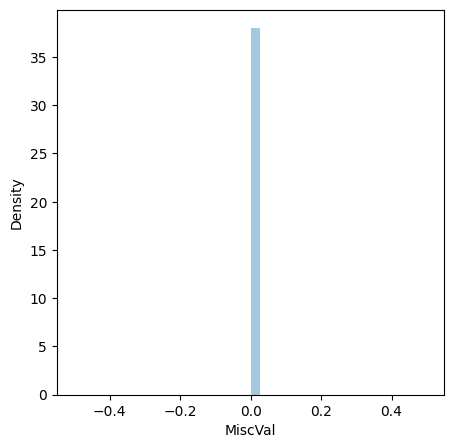

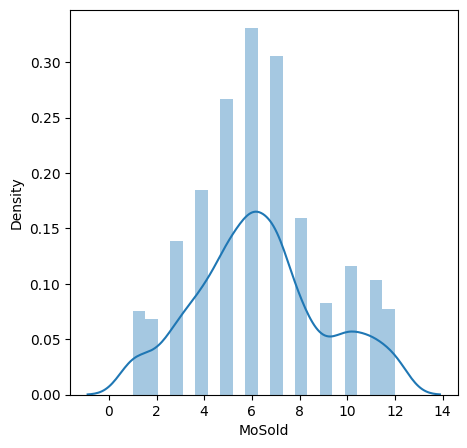

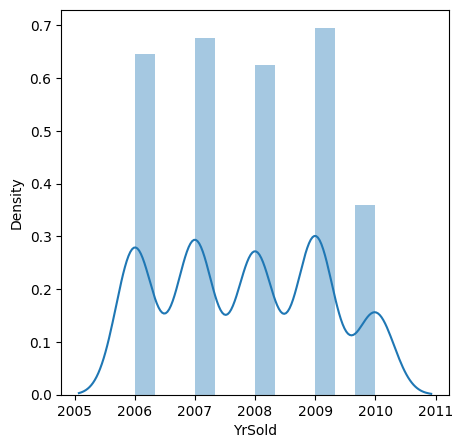

In [38]:
# checking distribution of the data
for i in num_df.columns:
  plt.figure(figsize=(5,5))
  sns.distplot(num_df[i])
  plt.show()

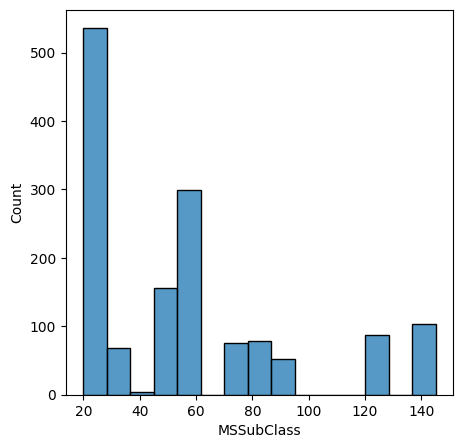

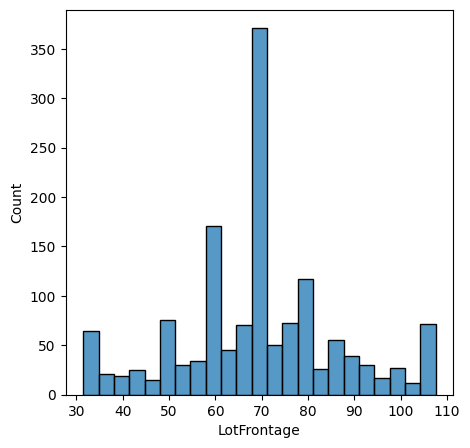

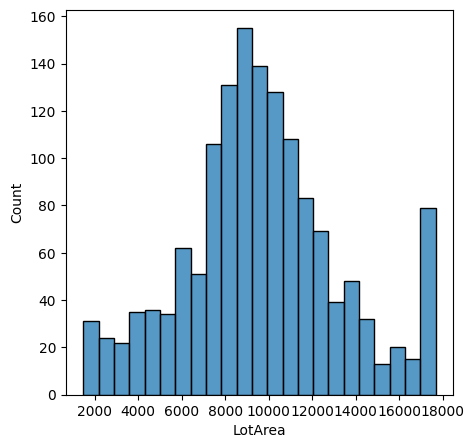

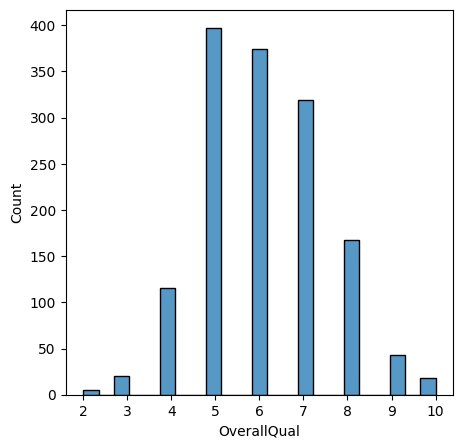

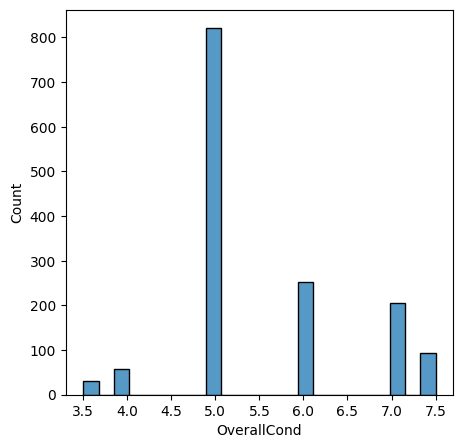

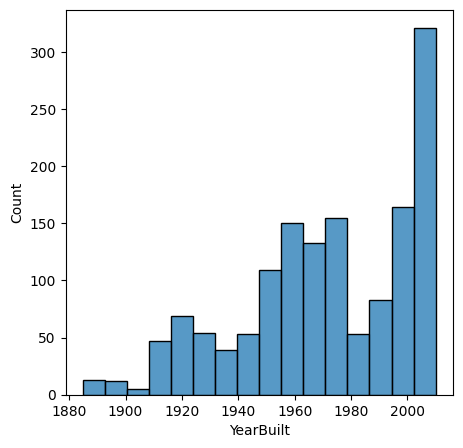

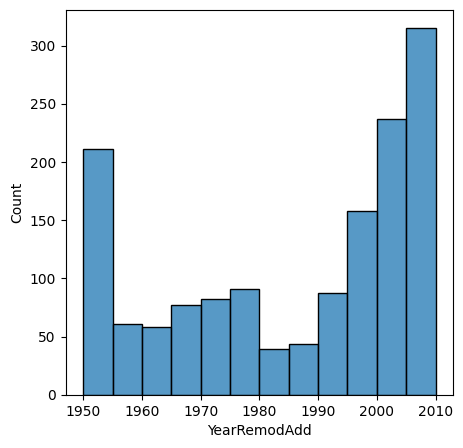

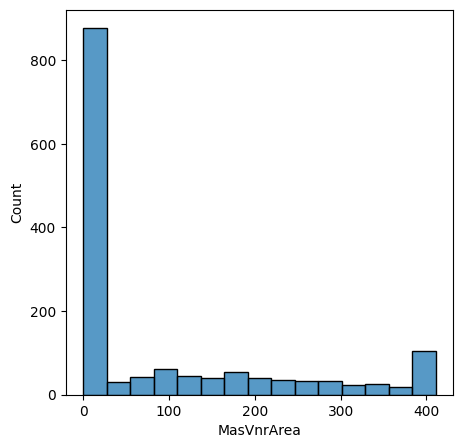

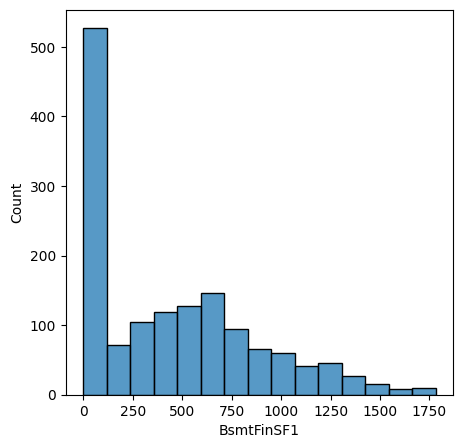

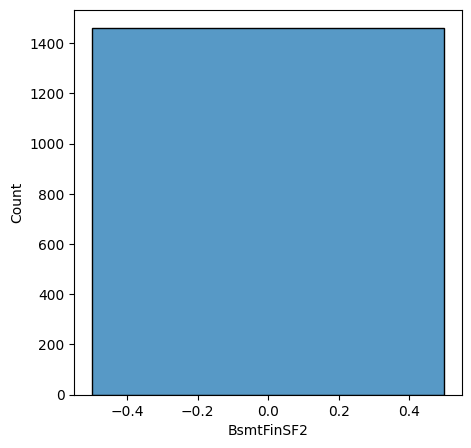

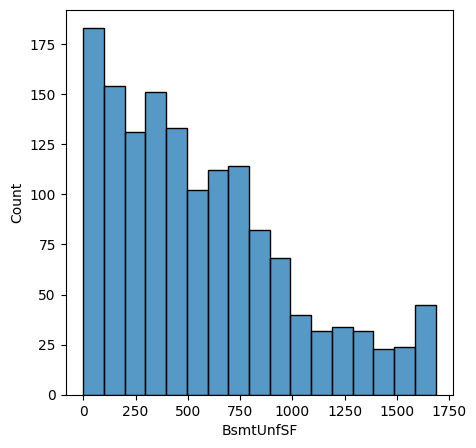

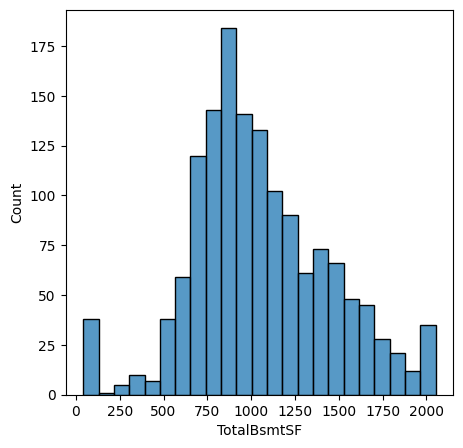

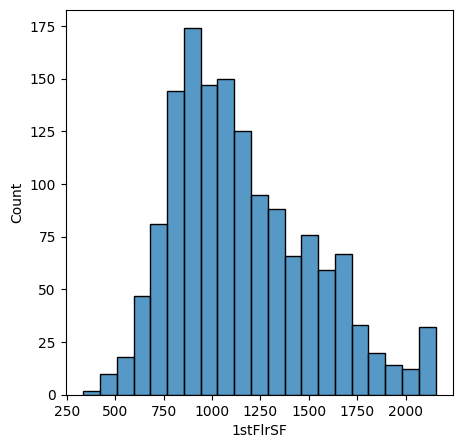

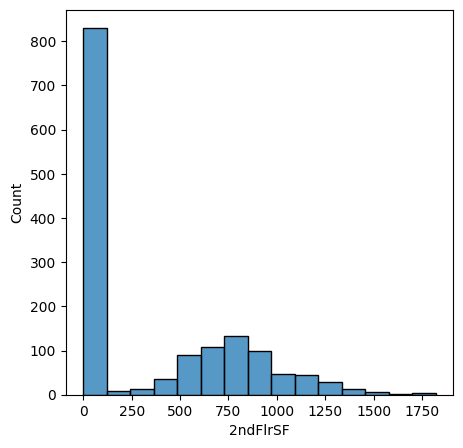

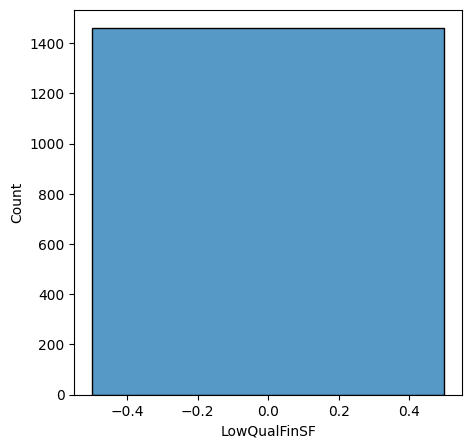

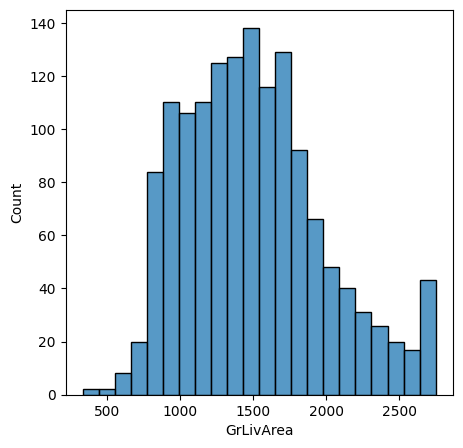

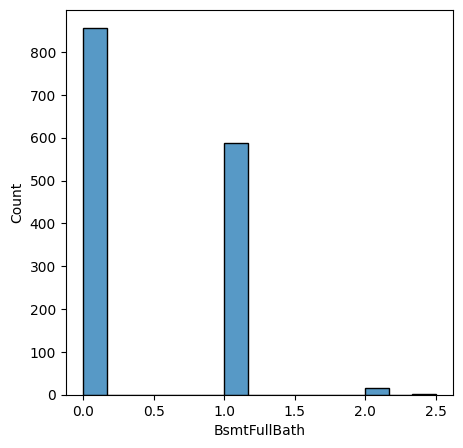

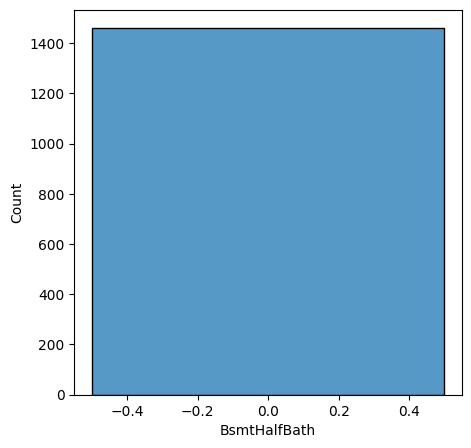

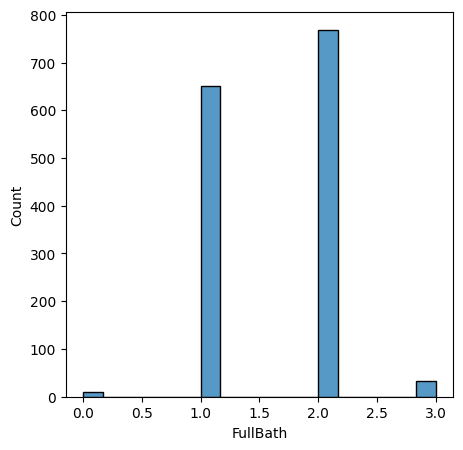

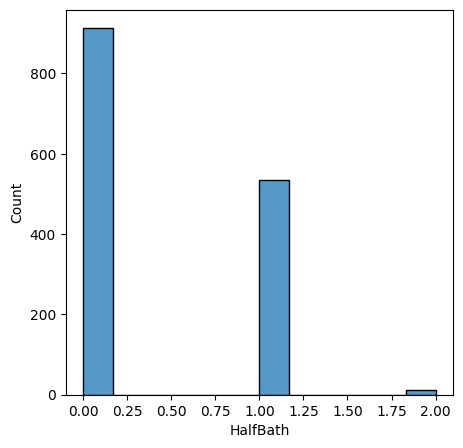

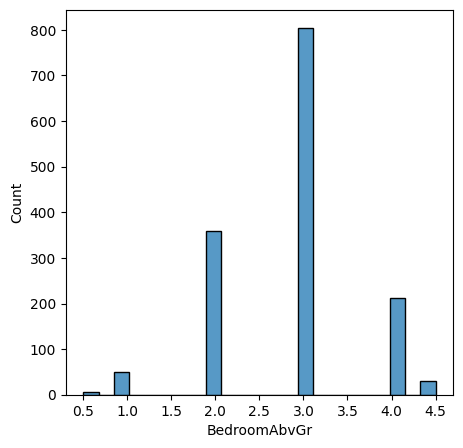

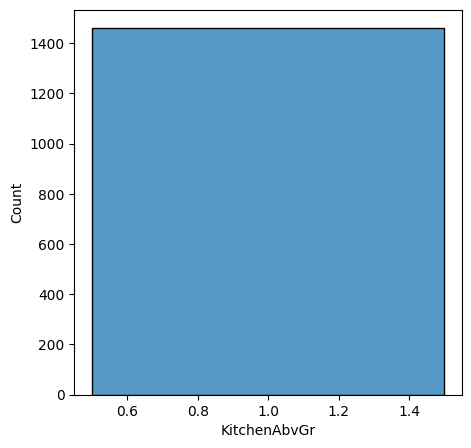

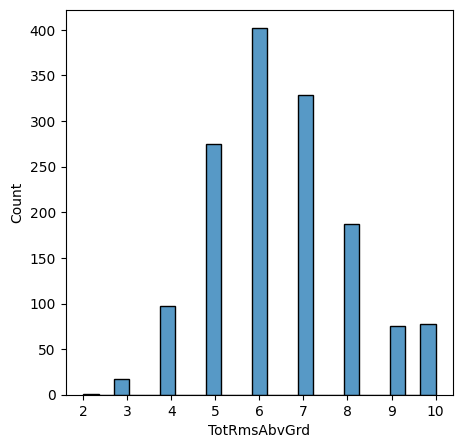

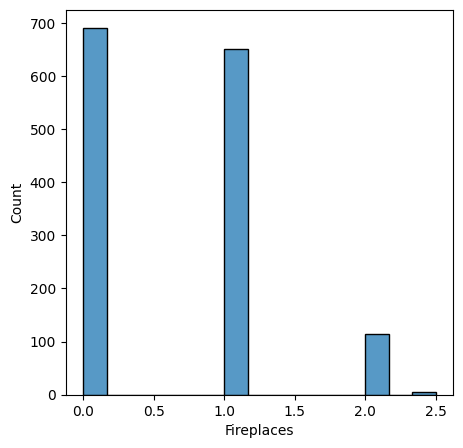

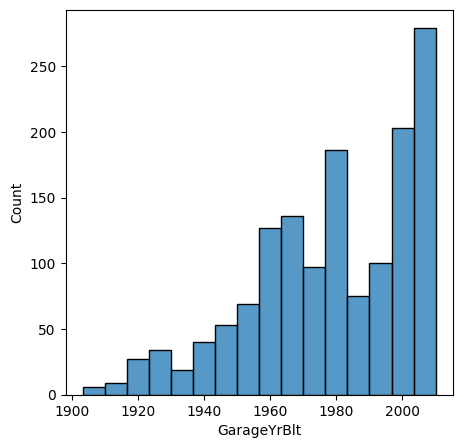

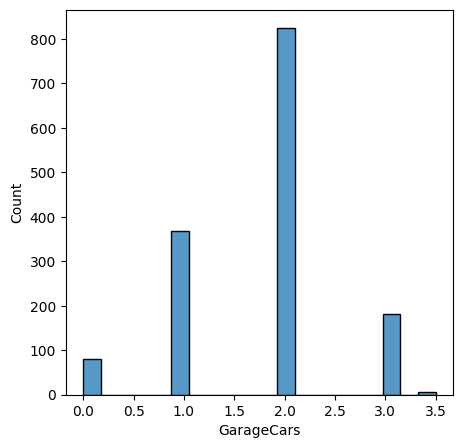

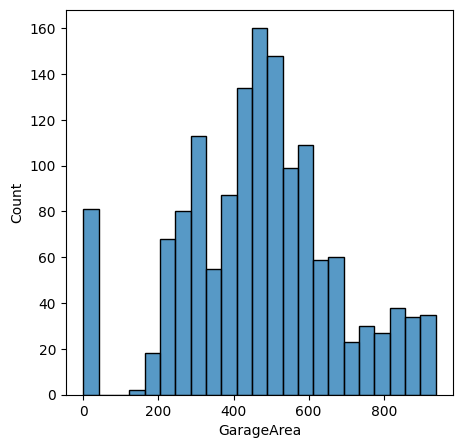

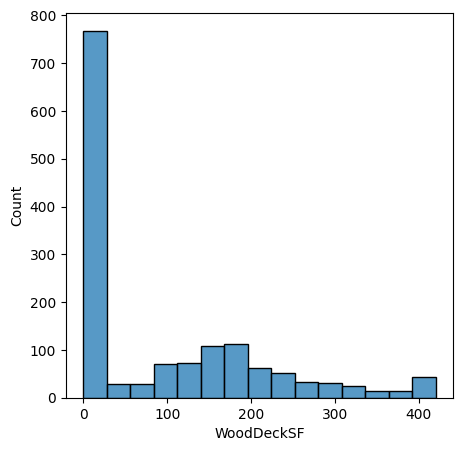

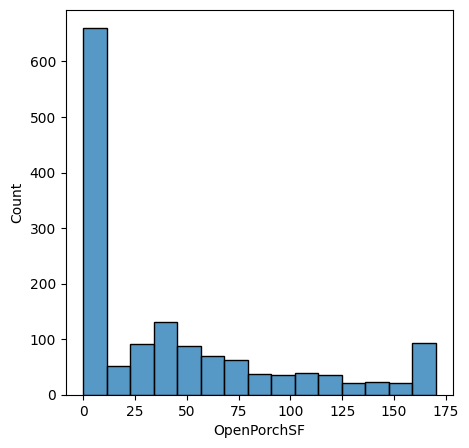

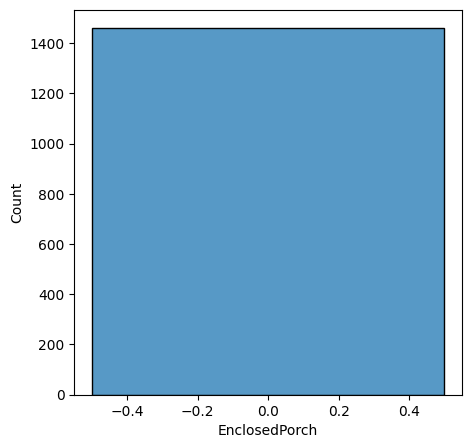

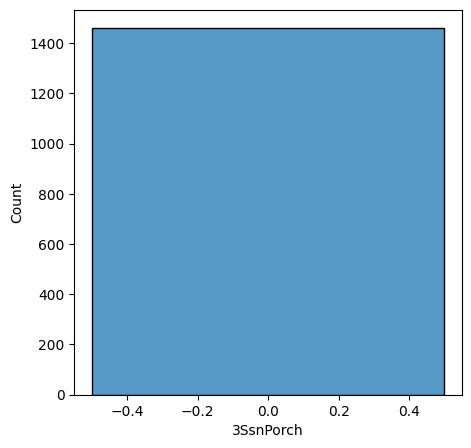

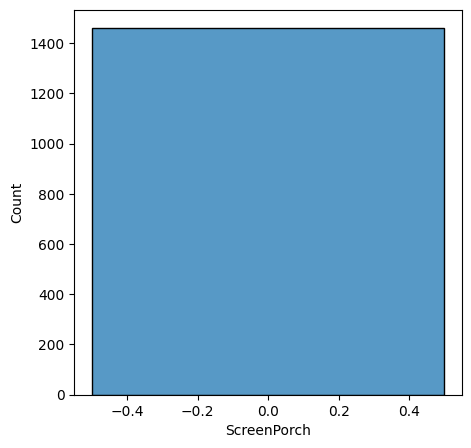

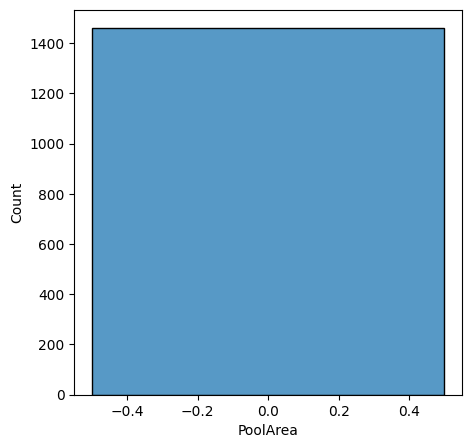

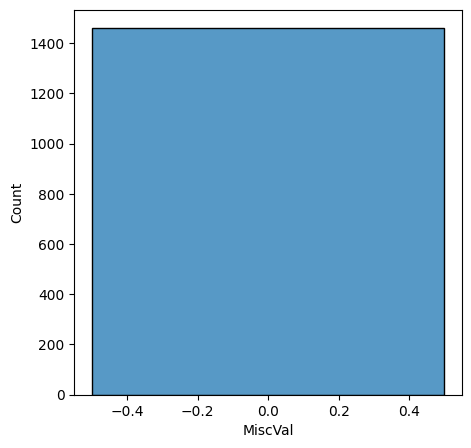

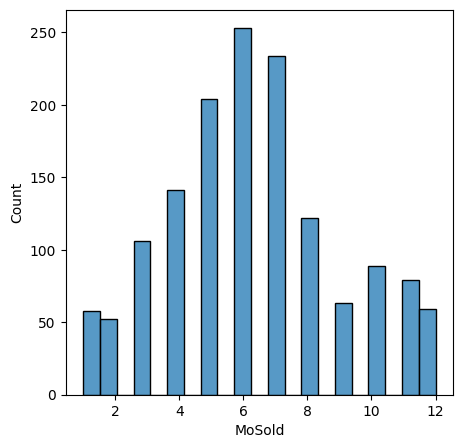

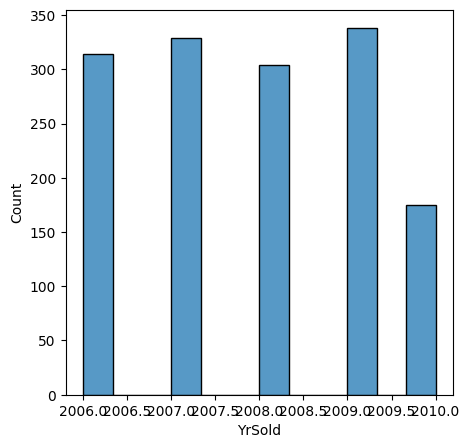

In [39]:
# checking distribution of the data
for i in num_df.columns:
  plt.figure(figsize=(5,5))
  sns.histplot(num_df[i])
  plt.show()

# 4.Data Preprocessing

In [40]:
# Encoding
for i in cat_df.columns:
  print(cat_df[i].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood

In [41]:
le = LabelEncoder()
for col in cat_df.columns:
  cat_df[col] = le.fit_transform(cat_df[col])
cat_df

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0            3       1         3            3          0          4   
1            3       1         3            3          0          2   
2            3       1         0            3          0          4   
3            3       1         0            3          0          0   
4            3       1         0            3          0          2   
...        ...     ...       ...          ...        ...        ...   
1455         3       1         3            3          0          4   
1456         3       1         3            3          0          4   
1457         3       1         3            3          0          4   
1458         3       1         3            3          0          4   
1459         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  Condition2  ...  Electrical  \
0             0             5           2           2  ...           4   
1             0            24           1           2  ...           4   
2             0             5           2           2  ...           4   
3             0             6           2           2  ...           4   
4             0            15           2           2  ...           4   
...         ...           ...         ...         ...  ...         ...   
1455          0             8           2           2  ...           4   
1456          0            14           2           2  ...           4   
1457          0             6           2           2  ...           4   
1458          0            12           2           2  ...           0   
1459          0             7           2           2  ...           4   

      KitchenQual  Functional  GarageType  GarageFinish  GarageQual  \
0               2           6           1             1           4   
1               3           6           1             1           4   
2               2           6           1             1           4   
3               2           6           5             2           4   
4               2           6           1             1           4   
...           ...         ...         ...           ...         ...   
1455            3           6           1             1           4   
1456            3           2           1             2           4   
1457            2           6           1             1           4   
1458            2           6           1             2           4   
1459            3           6           1             0           4   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0              4           2         8              4  
1              4           2         8              4  
2              4           2         8              4  
3              4           2         8              0  
4              4           2         8              4  
...          ...         ...       ...            ...  
1455           4           2         8              4  
1456           4           2         8              4  
1457           4           2         8              4  
1458           4           2         8              4  
1459           4           2         8              4  

[1460 rows x 37 columns]

In [42]:
df = pd.concat([num_df,cat_df],axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0   8450.0            7          5.0       2003   
1          20         80.0   9600.0            6          7.5       1976   
2          60         68.0  11250.0            7          5.0       2001   
3          70         60.0   9550.0            7          5.0       1915   
4          60         84.0  14260.0            8          5.0       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Electrical  \
0          2003       196.0       706.0           0  ...           4   
1          1976         0.0       978.0           0  ...           4   
2          2002       162.0       486.0           0  ...           4   
3          1970         0.0       216.0           0  ...           4   
4          2000       350.0       655.0           0  ...           4   

   KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  \
0            2           6           1             1           4           4   
1            3           6           1             1           4           4   
2            2           6           1             1           4           4   
3            2           6           5             2           4           4   
4            2           6           1             1           4           4   

   PavedDrive  SaleType  SaleCondition  
0           2         8              4  
1           2         8              4  
2           2         8              4  
3           2         8              0  
4           2         8              4  

[5 rows x 73 columns]

In [43]:
test = test.drop('Id',axis=1)
num_df_t = test.select_dtypes(exclude='object')
cat_df_t = test.select_dtypes(include='object')

In [44]:
num_df_t = num_df_t[num_df.columns]

In [45]:
cat_df_t = cat_df_t[cat_df.columns]

In [46]:
for i in cat_df_t.columns:
  le = LabelEncoder()
  cat_df_t[i] = le.fit_transform(cat_df_t[i])
  cat_df_t[i]

In [47]:
num_df_t = num_df_t.apply(outlier_treatment)

In [48]:
test_df = pd.concat([num_df_t,cat_df_t],axis=1)
test_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0  11622.0            5          6.0       1961   
1          20         81.0  14267.0            6          6.0       1958   
2          60         74.0  13830.0            5          5.0       1997   
3          60         78.0   9978.0            6          6.0       1998   
4         120         43.0   5005.0            8          5.0       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Electrical  \
0          1961         0.0       468.0         0.0  ...           3   
1          1958       108.0       923.0         0.0  ...           3   
2          1998         0.0       791.0         0.0  ...           3   
3          1998        20.0       602.0         0.0  ...           3   
4          1992         0.0       263.0         0.0  ...           3   

   KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  \
0            3           6           1             2           3           4   
1            2           6           1             2           3           4   
2            3           6           1             0           3           4   
3            2           6           1             0           3           4   
4            2           6           1             1           3           4   

   PavedDrive  SaleType  SaleCondition  
0           2         8              4  
1           2         8              4  
2           2         8              4  
3           2         8              4  
4           2         8              4  

[5 rows x 73 columns]

In [49]:
# Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [50]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1168, 73) (1168,)
(292, 73) (292,)


In [51]:
# Feature selection
best = RFE(estimator=LinearRegression(),n_features_to_select=25)
best.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [52]:
print("Selected Features:")
print(X_train.columns[best.support_])
print(best.ranking_)

Selected Features:
Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'Street', 'LandContour',
       'Utilities', 'LandSlope', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'PavedDrive'],
      dtype='object')
[19 27 40  1  1 23 29 39 31 41 37 33 22 25 43 32  1 42  1  1  1 44 28  1
 30  1 38 34 36 45 46 47 48 49 17  8 24  1  4  1  1 16  1 13 15  1  1  1
  1  1  7 12  1 35  1  1  1  1  5 21 18 14  1 26  1  3  9 20  6  2  1 10
 11]


In [53]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Ranking']= best.ranking_

In [54]:
features

Feature  Ranking
0      MSSubClass       19
1     LotFrontage       27
2         LotArea       40
3     OverallQual        1
4     OverallCond        1
..            ...      ...
68     GarageQual        6
69     GarageCond        2
70     PavedDrive        1
71       SaleType       10
72  SaleCondition       11

[73 rows x 2 columns]

In [55]:
top_vars = features[features['Ranking']==1]['Feature'].values
top_vars

array(['OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'Street',
       'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir',
       'KitchenQual', 'PavedDrive'], dtype=object)

In [56]:
X_train = X_train[top_vars]
X_test = X_test[top_vars]

In [57]:
test_df = test_df[top_vars]

# 6.Model Implementation


In [58]:
### Implementing DecisionTreeRegressor model
tree = DecisionTreeRegressor()
model = tree.fit(X_train,y_train)
# Making prediction on training set
train_pred = model.predict(X_train)
# Making prediction on test set
test_pred = model.predict(X_test)

In [59]:
# Evaluating model predictions
dt_train_acc =metrics.r2_score(y_train,train_pred)
dt_train_acc

0.9921309273677216

In [60]:
dt_test_acc = metrics.r2_score(y_test,test_pred)
dt_test_acc

0.7565935365553557

In [63]:
# Model
dt = DecisionTreeRegressor(random_state=42)

# Parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features':  ['sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 15}
Best R2 Score: 0.7125669379130821


In [66]:
tree1 = DecisionTreeRegressor(criterion='absolute_error',
                             max_depth = 15,
                             max_features = 'log2',
                             min_samples_leaf = 2,
                             min_samples_split =15,
                              )

model1 = tree1.fit(X_train,y_train)
train_pred1 = model1.predict(X_train)
test_pred1 = model1.predict(X_test)


In [67]:
# Model evaluation
dt_train_acc1 =metrics.r2_score(y_train,train_pred1)
dt_train_acc1

0.822700520259307

In [68]:
# Model evaluation
dt_test_acc1 =metrics.r2_score(y_test,test_pred1)
dt_test_acc1

0.7073362429150998

# Implementation of XGBoostRegressor

In [69]:
# Implementing XGBoostRegressor
xgb = XGBRegressor()
model2 = xgb.fit(X_train,y_train)
train_pred2 = model2.predict(X_train)
test_pred2 = model2.predict(X_test)

In [70]:
# XGboost model evaluation
xgb_train_acc = metrics.r2_score(y_train,train_pred2)
xgb_train_acc

0.9812864065170288

In [72]:
# XGboost model evaluation
xgb_test_acc = metrics.r2_score(y_test,test_pred2)
xgb_test_acc

0.8274112343788147

# Hyper parameter tuning for XgBoost model

In [73]:
param_grid = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [300, 400, 500]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best R2 Score: 0.8241373538970947


In [74]:
model3 = XGBRegressor(colsample_bytree = 0.7,
                      learning_rate = 0.05,
                      max_depth = 4,
                      n_estimators = 300,
                      subsample = 0.8)
model3.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [77]:
train_pred_Xg =model3.predict(X_train)
test_pred_Xg = model3.predict(X_test)

In [78]:
train_acc_XG = metrics.r2_score(y_train,train_pred_Xg)
test_acc_XG = metrics.r2_score(y_test,test_pred_Xg)

In [79]:
test_acc_XG

0.8709244132041931

In [80]:
train_acc_XG

0.9447535872459412

# Implementing LinearRegression model

In [82]:
linear = LinearRegression()
model4 = linear.fit(X_train,y_train)

In [83]:
train_pred_lr = model4.predict(X_train)
test_pred_lr = model4.predict(X_test)

In [84]:
# Linear regression model predictions
train_acc_lr = metrics.r2_score(y_train,train_pred_lr)
test_acc_lr = metrics.r2_score(y_test,test_pred_lr)

In [85]:
train_acc_lr

0.8013386655792369

In [86]:
test_acc_lr

0.7928146393445503

In [87]:
accuracy = pd.DataFrame({'Model':['DecisionTree','DecisionTree_parameter','XgBoost','Xgboost_params',
                                  'linearRegression'],
                         'train_acc':[dt_train_acc,dt_train_acc1,xgb_train_acc,train_acc_XG,train_acc_lr],
                         'test_acc':[dt_test_acc,dt_test_acc1,xgb_test_acc,test_acc_XG,test_acc_lr]})


In [88]:
accuracy

Model  train_acc  test_acc
0            DecisionTree   0.992131  0.756594
1  DecisionTree_parameter   0.822701  0.707336
2                 XgBoost   0.981286  0.827411
3          Xgboost_params   0.944754  0.870924
4        linearRegression   0.801339  0.792815

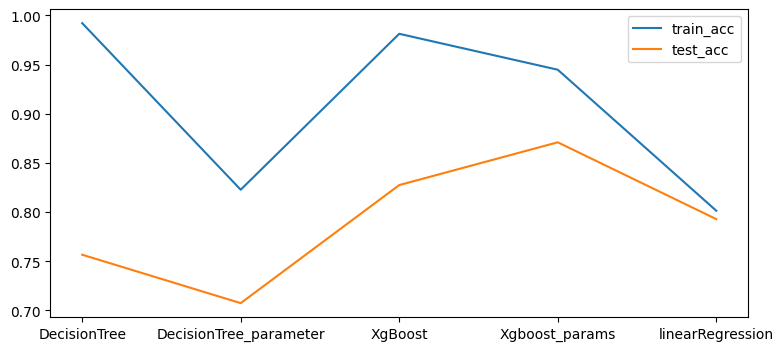

In [93]:
plt.figure(figsize=(9,4))
plt.plot(accuracy['Model'],accuracy['train_acc'],label='train_acc')
plt.plot(accuracy['Model'],accuracy['test_acc'],label='test_acc')
plt.legend()
plt.show()

# Applying XGBoost with best hyper parameters model for testing dataset for prediciton


In [94]:
test_pred = model3.predict(test_df)

In [96]:
test_pred

array([115058.4 , 135386.8 , 159676.78, ..., 152817.64, 113485.51,
       229652.97], dtype=float32)

In [97]:
test_df['XgBoost_predH'] = test_pred

In [99]:
test_df.head()

OverallQual  OverallCond  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0            5          6.0           0.0       1.0         0           2.0   
1            6          6.0           0.0       1.0         1           3.0   
2            5          5.0           0.0       2.0         1           3.0   
3            6          6.0           0.0       2.0         1           3.0   
4            8          5.0           0.0       2.0         0           2.0   

   Fireplaces  GarageCars  Street  LandContour  ...  RoofMatl  ExterQual  \
0         0.0         1.0       1            3  ...         0          3   
1         0.0         1.0       1            3  ...         0          3   
2         1.0         2.0       1            3  ...         0          3   
3         1.0         2.0       1            3  ...         0          3   
4         0.0         2.0       1            1  ...         0          2   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  CentralAir  KitchenQual  \
0           1         3         3             3           1            3   
1           1         3         3             3           1            2   
2           2         2         3             3           1            3   
3           2         3         3             3           1            2   
4           2         2         3             3           1            2   

   PavedDrive  XgBoost_predH  
0           2  115058.398438  
1           2  135386.796875  
2           2  159676.781250  
3           2  184456.390625  
4           2  171172.359375  

[5 rows x 26 columns]